In [211]:
import numpy as np
from scipy.stats import norm

def bsm_greeks(S, K, T, r, sigma, option_type='Call',greek="Delta"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        # premium = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        if greek == "Delta":
            return norm.cdf(d1)
        elif greek == "Gamma":
            return norm.pdf(d1) / (S * sigma * np.sqrt(T))
        elif greek == "Theta":
            return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
        elif greek == "Vega":
            return S * np.sqrt(T) * norm.pdf(d1)
        elif greek == "Rho":
            return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'Put':
        # premium = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        if greek == "Delta":
            return -norm.cdf(-d1)
        elif greek == "Gamma":
            return norm.pdf(d1) / (S * sigma * np.sqrt(T))
        elif greek == "Theta":
            return -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)
        elif greek == "Vega":
            return S * np.sqrt(T) * norm.pdf(d1)
        elif greek == "Rho":
            return -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Please choose 'Call' or 'Put'.")
    
def bsm_premium(S, K, T, r, sigma, option_type='Call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
   



In [212]:
import matplotlib.pyplot as plt

0.09269473142642104


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-0.0003292226613194381
-2.9630039518749456
0.17418619355224862


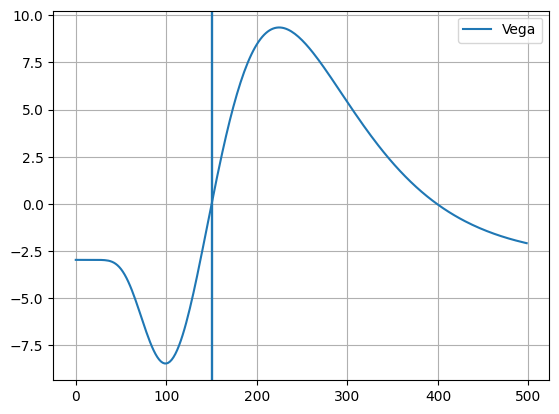

In [213]:
S = [i for i in range(0,500,2)]
K = [150,165]
sigma = 0.4
T = 1
rfr = 0.0533
s = 150
delta_buy  = bsm_greeks(s,K[0],T,rfr,sigma)
delta_sell = -bsm_greeks(s,K[1],T,rfr,sigma)
print(delta_buy+delta_sell)

net_delta = [delta_sell+delta_buy-bsm_greeks(i,K[0],T,rfr,sigma)+bsm_greeks(i,K[1],T,rfr,sigma) for i in S]
# plt.plot(S,net_delta,label="Delta")
plt.axvline(x = s)
plt.legend()
plt.grid(True)

gamma_buy  = bsm_greeks(s,K[0],T,rfr,sigma,"Call","Gamma")
gamma_sell = -bsm_greeks(s,K[1],T,rfr,sigma,"Call","Gamma")
print(gamma_buy+gamma_sell)

net_gamma = [gamma_sell+gamma_buy-bsm_greeks(i,K[0],T,rfr,sigma,"Call","Gamma")+bsm_greeks(i,K[1],T,rfr,sigma,"Call","Gamma") for i in S]
# plt.plot(S,net_gamma,label="Gamma")
plt.axvline(x = s)
plt.legend()
plt.grid(True)

vega_buy  = bsm_greeks(s,K[0],T,rfr,sigma,"Call","Vega")
vega_sell = -bsm_greeks(s,K[1],T,rfr,sigma,"Call","Vega")
print(vega_buy+vega_sell)

net_vega = [vega_sell+vega_buy-bsm_greeks(i,K[0],T,rfr,sigma,"Call","Vega")+bsm_greeks(i,K[1],T,rfr,sigma,"Call","Vega") for i in S]
plt.plot(S,net_vega,label="Vega")
plt.axvline(x = s)
plt.legend()
plt.grid(True)

theta_buy  = bsm_greeks(s,K[0],T,rfr,sigma,"Call","Theta")
theta_sell = -bsm_greeks(s,K[1],T,rfr,sigma,"Call","Theta")
print(theta_buy+theta_sell)

net_theta = [theta_sell+theta_buy-bsm_greeks(i,K[0],T,rfr,sigma,"Call","Theta")+bsm_greeks(i,K[1],T,rfr,sigma,"Call","Theta") for i in S]
# plt.plot(S,net_theta,label="Theta")
plt.axvline(x = s)
plt.legend()
plt.grid(True)

BULL_CALL SPREAD

-6.054029661003682


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:36: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


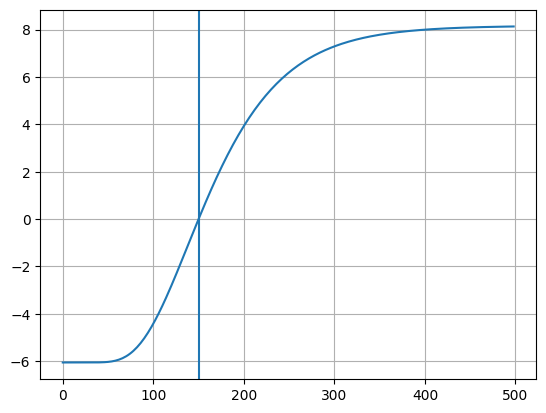

In [214]:
S = [i for i in range(0,500,2)]
K = [150,165]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],T,rfr,sigma,"Call")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],T,rfr,sigma,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BEAR_CALL SPREAD

6.054029661003682


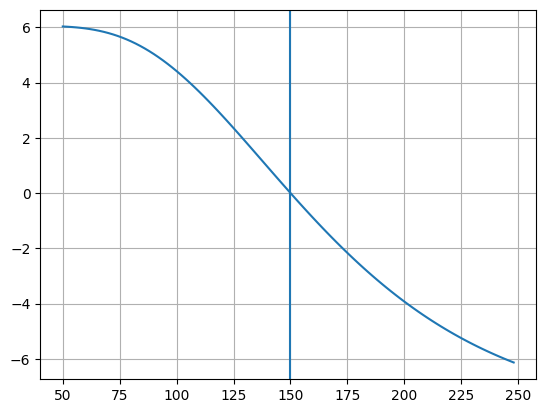

In [215]:
S = [i for i in range(50,250,2)]
K = [150,165]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
#ATM CALL SELL
paid_1 = bsm_premium(150,K[0],T,rfr,sigma,"Call")
payoff_1 = [paid_1-i for i in Premium_1]
# print(payoff_1)
#OTM CALL BUY
rec_2 = -bsm_premium(150,K[1],T,rfr,sigma,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2+i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BULL_PUT SPREAD

6.756605050886975


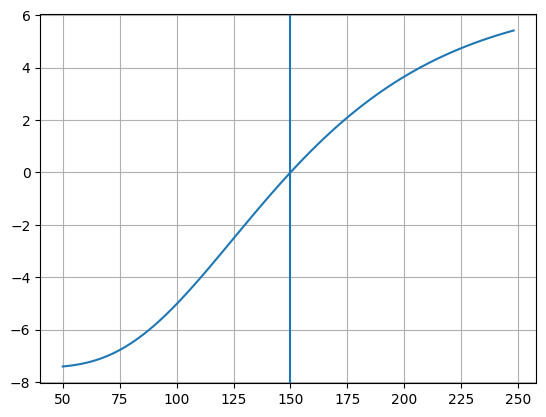

In [216]:
S = [i for i in range(50,250,2)]
K = [150,135]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Put") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Put") for i in S]
#ATM PUT SELL
paid_1 = bsm_premium(150,K[0],T,rfr,sigma,"Put")
payoff_1 = [paid_1-i for i in Premium_1]
# print(payoff_1)
#OTM PUT bUY
rec_2 = -bsm_premium(150,K[1],T,rfr,sigma,"Put")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2+i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BEAR_PUT SPREAD

-6.756605050886975


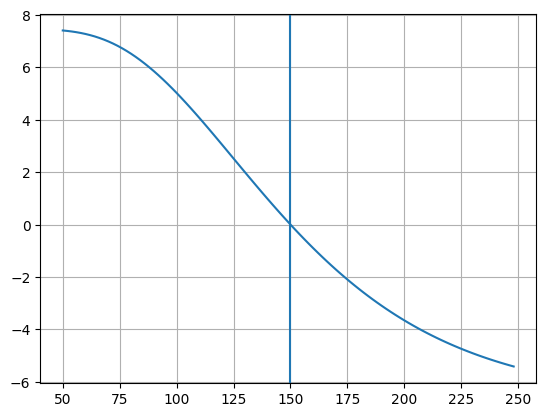

In [217]:
S = [i for i in range(50,250,2)]
K = [150,135]
sigma = 0.4
T = 1
rfr = 0.0533

Premium_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Put") for i in S]
Premium_2 = [bsm_premium(i,K[1],T,rfr,sigma,"Put") for i in S]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],T,rfr,sigma,"Put")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],T,rfr,sigma,"Put")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(S,net)
plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BULL-CALL FLY

60.837785020686795
-42.297723572356105
-21.73569495392411


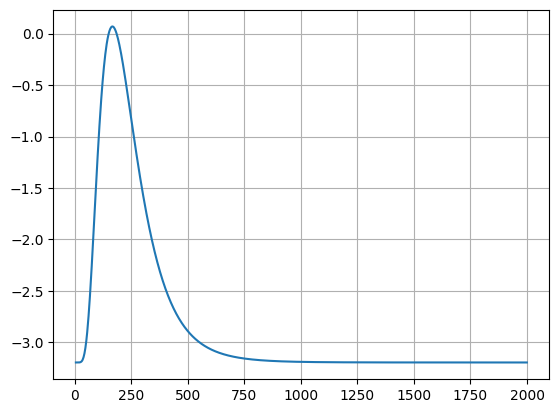

In [218]:
S = [i for i in range(5,2000,2)]
K = [125,150,175]
sigma = 1
T = 0.25
rfr = 0.0533
#CALL PREMIUM for itm,atm,otm
itm = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
atm = [bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
otm = [bsm_premium(i,K[2],T,rfr,sigma,"Call") for i in S]

#ATM CALL SELL
rec = bsm_premium(150,K[1],T,rfr,sigma,"Call")*2
print(rec)
atm_payoff = [rec-i*2 for i in atm]
# print(atm_payoff)
#ITM call buy
pay_1 = -bsm_premium(150,K[0],T,rfr,sigma,"Call")
print(pay_1)
itm_payoff = [pay_1+i for i in itm]
# print(itm_payoff)
#OTM CALL BUY
pay_2 = -bsm_premium(150,K[2],T,rfr,sigma,"Call")
print(pay_2)
otm_payoff = [pay_2+i for i in otm]
# print(otm_payoff)
net = [atm_payoff[i]+itm_payoff[i]+otm_payoff[i] for i in range(len(atm_payoff))]
# for i in range(len(net)):
#     if net[i]>0:
#         print(S[i],net[i])
plt.plot(S,net)
plt.grid(True)

BULL-CALL SPREAD CONSTANT SPOT AND INCREASING VOL

-5.8092497586159055


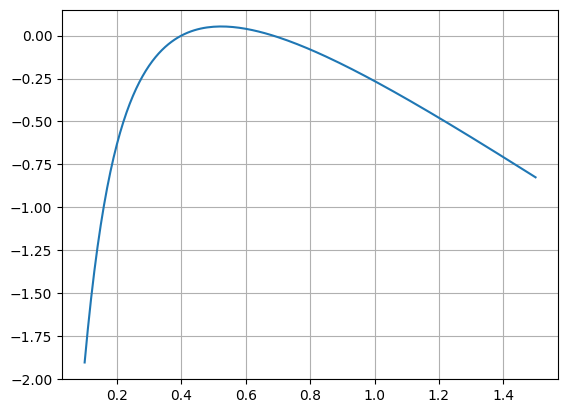

In [219]:
S = 150
K = [150,165]
vol = 0.4
sigma = [i/100 for i in range(10,151)]
T = 0.25
rfr = 0.0533

Premium_1 = [bsm_premium(S,K[0],T,rfr,i,"Call") for i in sigma]
Premium_2 = [bsm_premium(S,K[1],T,rfr,i,"Call") for i in sigma]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],T,rfr,vol,"Call")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],T,rfr,vol,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(sigma,net)
# plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

BEAR-CALL SPREAD MOVING VOL

5.8092497586159055


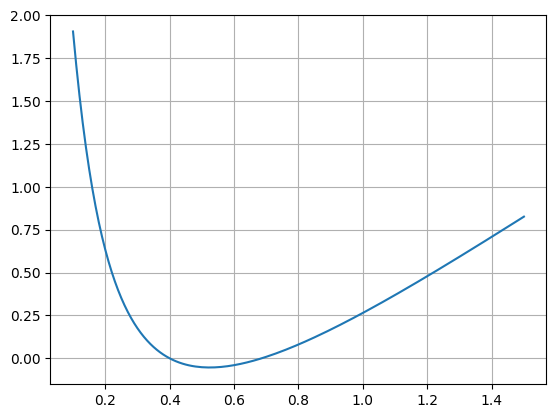

In [220]:
S = 150
K = [150,165]
sigma = [i/100 for i in range(10,151)]
T = 0.25
rfr = 0.0533
vol =0.4
Premium_1 = [bsm_premium(S,K[0],T,rfr,i,"Call") for i in sigma]
Premium_2 = [bsm_premium(S,K[1],T,rfr,i,"Call") for i in sigma]
#ATM CALL SELL
paid_1 = bsm_premium(150,K[0],T,rfr,vol,"Call")
payoff_1 = [paid_1-i for i in Premium_1]
# print(payoff_1)
#OTM CALL BUY
rec_2 = -bsm_premium(150,K[1],T,rfr,vol,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2+i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(sigma,net)
# plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

Bull_Call Moving Time

-5.8092497586159055


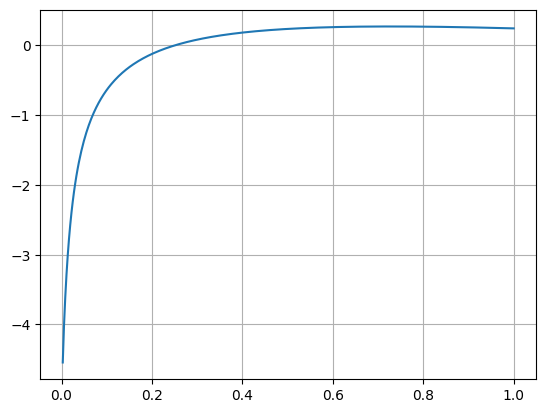

In [221]:
S = 150
K = [150,165]
vol = 0.4
sigma = 0.4
T = [i/365 for i in range(365,0,-1)]
t = 0.25
rfr = 0.0533

Premium_1 = [bsm_premium(S,K[0],i,rfr,sigma,"Call") for i in T]
Premium_2 = [bsm_premium(S,K[1],i,rfr,sigma,"Call") for i in T]
#ATM CALL BUY
paid_1 = -bsm_premium(150,K[0],t,rfr,vol,"Call")
payoff_1 = [paid_1+i for i in Premium_1]
# print(payoff_1)
#OTM CALL SELL
rec_2 = bsm_premium(150,K[1],t,rfr,vol,"Call")
initial_pnl = paid_1 + rec_2
print(initial_pnl)
payoff_2 = [rec_2-i for i in Premium_2]
# print(payoff_2)
net = [payoff_1[i] + payoff_2[i] for i in range(len(payoff_1))]
plt.plot(T,net)
# plt.axvline(x=150,)
# plt.plot(S,payoff_2)
plt.grid(True)

# BULL-CALL SPREAD MOVING SPOT DIFFERENT SPREADS

initial investment of  -1.58  for strike  [95, 97]
Breakout at  164  for Buy at  95  and Sell at  97 with profit of  0.3

initial investment of  -1.48  for strike  [100, 102]
Breakout at  164  for Buy at  100  and Sell at  102 with profit of  0.37

initial investment of  -1.37  for strike  [105, 107]
Breakout at  170  for Buy at  105  and Sell at  107 with profit of  0.47

initial investment of  -1.26  for strike  [110, 112]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:36: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


Breakout at  182  for Buy at  110  and Sell at  112 with profit of  0.6

initial investment of  -1.14  for strike  [115, 117]
Breakout at  186  for Buy at  115  and Sell at  117 with profit of  0.7

initial investment of  -1.03  for strike  [120, 122]
Breakout at  198  for Buy at  120  and Sell at  122 with profit of  0.83

initial investment of  -0.92  for strike  [125, 127]
Breakout at  198  for Buy at  125  and Sell at  127 with profit of  0.91

initial investment of  -0.81  for strike  [130, 132]
Breakout at  212  for Buy at  130  and Sell at  132 with profit of  1.04

initial investment of  -0.71  for strike  [135, 137]
Breakout at  208  for Buy at  135  and Sell at  137 with profit of  1.09

initial investment of  -0.62  for strike  [140, 142]
Breakout at  220  for Buy at  140  and Sell at  142 with profit of  1.2

initial investment of  -0.54  for strike  [145, 147]
Breakout at  232  for Buy at  145  and Sell at  147 with profit of  1.3

initial investment of  -0.46  for strike 

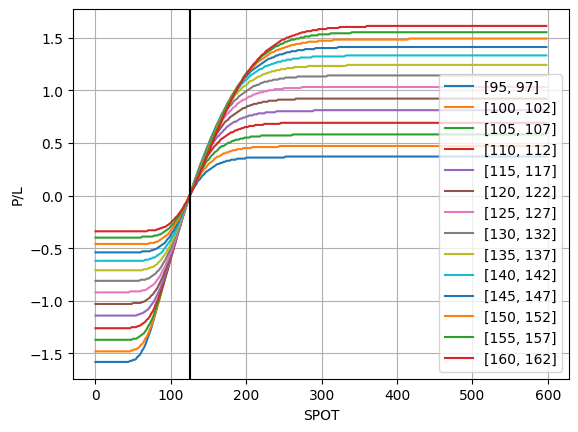

In [222]:
S = [i for i in range(0,600,2)]
T = 0.5
rfr = 0.0533
sigma = 0.4
K = [[i,i+2] for i in range(95,165,5)]
# print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [pay+bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in K:
    a = call_spread(atm,S,i,T,sigma,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",i[0]," and Sell at ",i[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    plt.plot(S,a,label=i)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.legend()
plt.grid(True)

# BULL-CALL SPREAD MOVING VOLATILITY DIFFERERNT SPREADS
- Here P/L is just the net debit of each spread as spot is not moving

Strikes :  [[95, 97], [100, 102], [105, 107], [110, 112], [115, 117], [120, 122], [125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -1.5816242444935966
initial :  -1.4801259179193806
initial :  -1.3707930922437015
initial :  -1.2567225392885462
initial :  -1.1409746696424037
initial :  -1.026349590285072
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


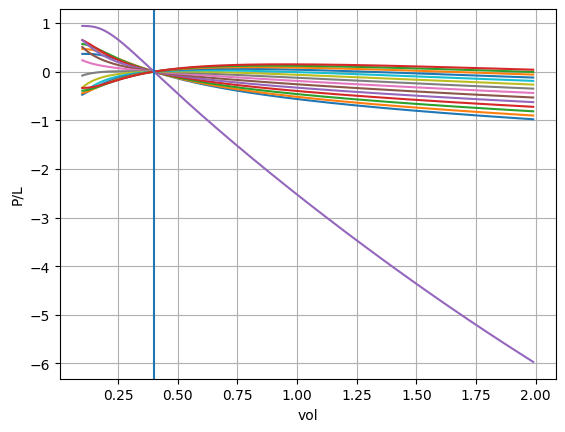

In [223]:
S = 125
T = 0.5
rfr = 0.0533
VOL = 0.4
sigma = [i/100 for i in range(10,200)]
K = [[i,i+2] for i in range(95,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(VOL,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(S,K[0],T,rfr,VOL,"Call")
    recv = bsm_premium(S,K[1],T,rfr,VOL,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S,K[0],T,rfr,i,"Call") for i in sigma]
    payoff_2 = [recv-bsm_premium(S,K[1],T,rfr,i,"Call") for i in sigma]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in K:
    a = call_spread(VOL,S,i,T,sigma,rfr)
    plt.plot(sigma,a,label=i)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(sigma,res)
plt.xlabel("vol")
plt.ylabel("P/L")
plt.axvline(x= VOL)
plt.grid(True)

# BULL-CALL SPREAD MOVING TIME DIFFERENT SPREADS

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


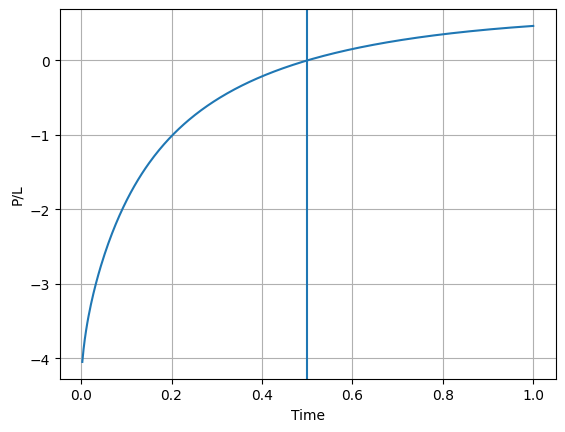

In [224]:
S = 125
T = 0.5
rfr = 0.0533
sigma = 0.4
tte = [i/365 for i in range(365,0,-1)]
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(S,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(S,K[1],T,rfr,sigma,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S,K[0],i,rfr,sigma,"Call") for i in tte]
    payoff_2 = [recv-bsm_premium(S,K[1],i,rfr,sigma,"Call") for i in tte]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in K:
    a = call_spread(tte,S,i,T,sigma,rfr)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(tte,res)
plt.xlabel("Time")
plt.ylabel("P/L")
plt.axvline(x= T)
plt.grid(True)

- As we are approaching maturity, premium for lower strike would increase and for the higher strike it will increase, making our net debit higher

# BULL-CALL SPREAD MOVING SPOT AND VOL DIFFERENT SPREADS

In [225]:

sigma = [i/1000 if i>=100 else i/100 for i in range(10,1110,4)]
print(sigma)
len(sigma)

[0.1, 0.14, 0.18, 0.22, 0.26, 0.3, 0.34, 0.38, 0.42, 0.46, 0.5, 0.54, 0.58, 0.62, 0.66, 0.7, 0.74, 0.78, 0.82, 0.86, 0.9, 0.94, 0.98, 0.102, 0.106, 0.11, 0.114, 0.118, 0.122, 0.126, 0.13, 0.134, 0.138, 0.142, 0.146, 0.15, 0.154, 0.158, 0.162, 0.166, 0.17, 0.174, 0.178, 0.182, 0.186, 0.19, 0.194, 0.198, 0.202, 0.206, 0.21, 0.214, 0.218, 0.222, 0.226, 0.23, 0.234, 0.238, 0.242, 0.246, 0.25, 0.254, 0.258, 0.262, 0.266, 0.27, 0.274, 0.278, 0.282, 0.286, 0.29, 0.294, 0.298, 0.302, 0.306, 0.31, 0.314, 0.318, 0.322, 0.326, 0.33, 0.334, 0.338, 0.342, 0.346, 0.35, 0.354, 0.358, 0.362, 0.366, 0.37, 0.374, 0.378, 0.382, 0.386, 0.39, 0.394, 0.398, 0.402, 0.406, 0.41, 0.414, 0.418, 0.422, 0.426, 0.43, 0.434, 0.438, 0.442, 0.446, 0.45, 0.454, 0.458, 0.462, 0.466, 0.47, 0.474, 0.478, 0.482, 0.486, 0.49, 0.494, 0.498, 0.502, 0.506, 0.51, 0.514, 0.518, 0.522, 0.526, 0.53, 0.534, 0.538, 0.542, 0.546, 0.55, 0.554, 0.558, 0.562, 0.566, 0.57, 0.574, 0.578, 0.582, 0.586, 0.59, 0.594, 0.598, 0.602, 0.606, 0.

275

Strikes :  [[95, 97], [97, 99], [99, 101], [101, 103], [103, 105], [105, 107], [107, 109], [109, 111], [111, 113], [113, 115], [115, 117], [117, 119], [119, 121], [121, 123], [123, 125], [125, 127], [127, 129], [129, 131], [131, 133], [133, 135], [135, 137], [137, 139], [139, 141], [141, 143], [143, 145], [145, 147], [147, 149], [149, 151], [151, 153], [153, 155], [155, 157], [157, 159], [159, 161], [161, 163], [163, 165]]
initial :  -1.5816242444935966
initial :  -1.5421564780601642
initial :  -1.5011490082900423
initial :  -1.4587886588404615
initial :  -1.4152701976826592
initial :  -1.3707930922437015
initial :  -1.3255584536583456
initial :  -1.2797662219141017
initial :  -1.2336126294696896
initial :  -1.187287967807137
initial :  -1.1409746696424037
initial :  -1.0948457093437156
initial :  -1.0490633155662437
initial :  -1.0037779831934728
initial :  -0.9591277663100897
initial :  -0.9152378299992137
initial :  -0.8722202361118647
initial :  -0.8301739366371237
initial :  -0.78

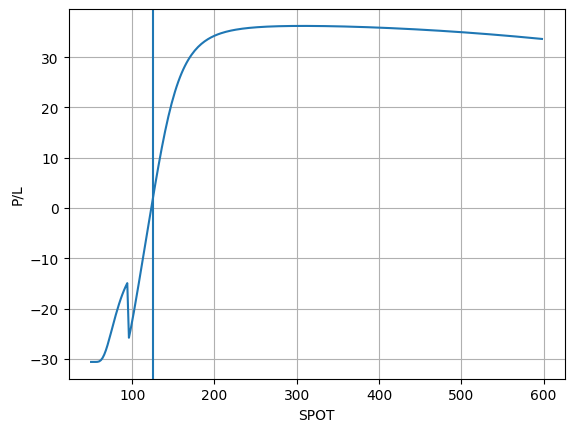

In [226]:
S = [i for i in range(50,600,2)]
T = 0.5
rfr = 0.0533
sigma = [i/1000 if i>=100 else i/100 for i in range(10,1110,4)]
K = [[i,i+2] for i in range(95,165,2)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,vol,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,vol,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,vol,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],T,rfr,sigma[i],"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],T,rfr,sigma[i],"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,vol,S,i,T,sigma,rfr)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


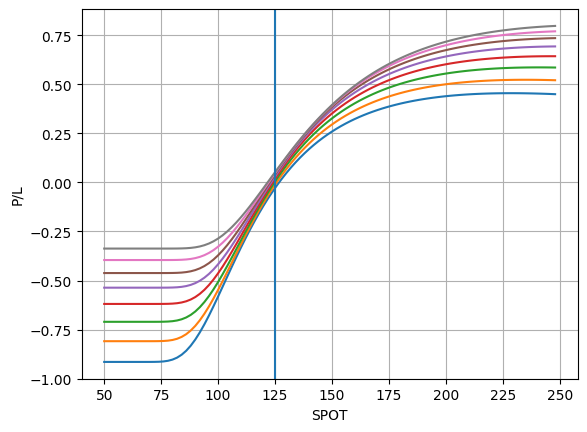

In [227]:
S = [i for i in range(50,250,2)]
T = 0.5
rfr = 0.0533
sigma = [i/100 for i in range(10,110)]
# sigma= sigma[::-1]
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,vol,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,vol,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,vol,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],T,rfr,sigma[i],"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],T,rfr,sigma[i],"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,vol,S,i,T,sigma,rfr)
    plt.plot(S,a)
    # plt.legend(i)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

# BULL-CALL SPREAD MOVING SPOT AND TTE

Strikes :  [[125, 130], [130, 135], [135, 140], [140, 145], [145, 150], [150, 155], [155, 160], [160, 165]]
initial :  -2.21
Breakout at  280  for Buy at  125  and Sell at  130 with profit of  2.46  net spot move  150

initial :  -1.95
Breakout at  284  for Buy at  130  and Sell at  135 with profit of  2.71  net spot move  149

initial :  -1.71
Breakout at  288  for Buy at  135  and Sell at  140 with profit of  2.94  net spot move  148

initial :  -1.49
Breakout at  292  for Buy at  140  and Sell at  145 with profit of  3.15  net spot move  147

initial :  -1.28
Breakout at  312  for Buy at  145  and Sell at  150 with profit of  3.41  net spot move  162

initial :  -1.1
Breakout at  318  for Buy at  150  and Sell at  155 with profit of  3.59  net spot move  163

initial :  -0.94
Breakout at  324  for Buy at  155  and Sell at  160 with profit of  3.75  net spot move  164

initial :  -0.8
Breakout at  330  for Buy at  160  and Sell at  165 with profit of  3.89  net spot move  165



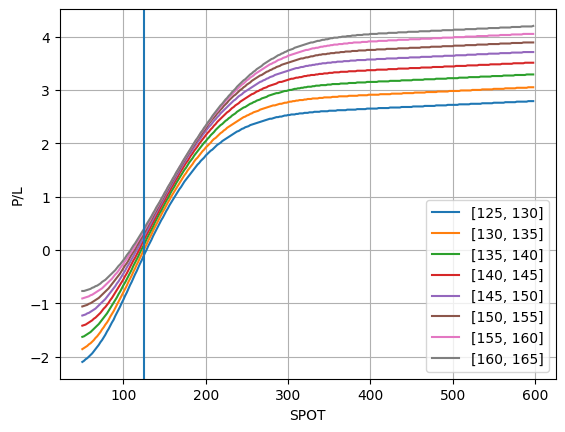

In [228]:
S = [i for i in range(50,600,2)]
T = 0.5
tte = [i/365 for i in range(550,0,-2)]
rfr = 0.0533
sigma = 0.4
K = [[i,i+5] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial : ",round(pay+recv,2))
    payoff_1 = [pay+bsm_premium(S[i],K[0],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,tte,S,i,T,sigma,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",i[0]," and Sell at ",i[1], "with profit of ",a[j]," net spot move ",S[j]-i[1])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    plt.plot(S,a,label=i)
    # plt.plot(S,a)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.legend()
plt.grid(True)


In [229]:
S = [i for i in range(50,600,2)]
print(len(S))
t = [i/365 for i in range(550,0,-2)]
print(len(t))

275
275


Strikes :  [[125, 127], [130, 132], [135, 137], [140, 142], [145, 147], [150, 152], [155, 157], [160, 162]]
initial :  -0.9152378299992137
initial :  -0.8095423996293292
initial :  -0.7106603831701861
initial :  -0.6195086824255043
initial :  -0.5365784664956266
initial :  -0.4620048906686094
initial :  -0.39564159838655044
initial :  -0.3371326105265382


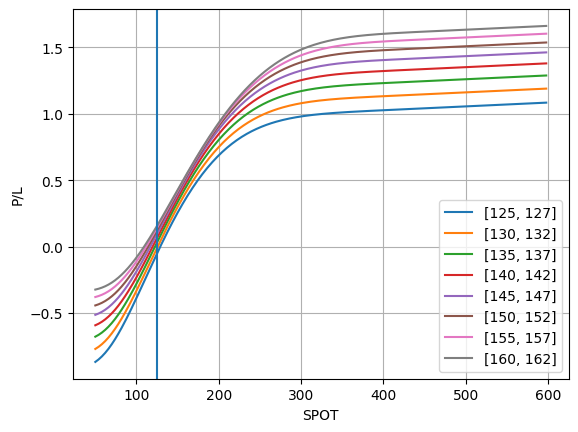

In [230]:
S = [i for i in range(50,600,2)]
T = 0.5
tte = [i/365 for i in range(550,0,-2)]
rfr = 0.0533
sigma = 0.4
K = [[i,i+2] for i in range(125,165,5)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],tte[i],rfr,sigma,"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,tte,S,i,T,sigma,rfr)
    plt.plot(S,a,label=i)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.legend()
plt.grid(True)

# BULL-CALL SPREAD MOVING SPOT,VOL,TTE

Strikes :  [[95, 97], [97, 99], [99, 101], [101, 103], [103, 105], [105, 107], [107, 109], [109, 111], [111, 113], [113, 115], [115, 117], [117, 119], [119, 121], [121, 123], [123, 125], [125, 127], [127, 129], [129, 131], [131, 133], [133, 135], [135, 137], [137, 139], [139, 141], [141, 143], [143, 145], [145, 147], [147, 149], [149, 151], [151, 153], [153, 155], [155, 157], [157, 159], [159, 161], [161, 163], [163, 165]]
initial :  -1.5816242444935966
initial :  -1.5421564780601642
initial :  -1.5011490082900423
initial :  -1.4587886588404615
initial :  -1.4152701976826592
initial :  -1.3707930922437015
initial :  -1.3255584536583456
initial :  -1.2797662219141017
initial :  -1.2336126294696896
initial :  -1.187287967807137
initial :  -1.1409746696424037
initial :  -1.0948457093437156
initial :  -1.0490633155662437
initial :  -1.0037779831934728
initial :  -0.9591277663100897
initial :  -0.9152378299992137
initial :  -0.8722202361118647
initial :  -0.8301739366371237
initial :  -0.78

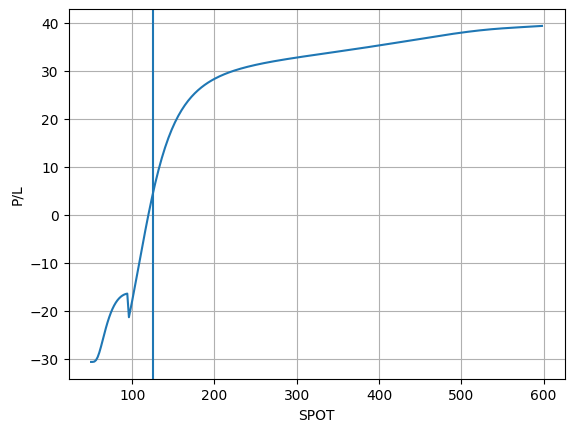

In [231]:
S = [i for i in range(50,600,2)]
T = 0.5
tte = [i/365 for i in range(550,0,-2)]
rfr = 0.0533
sigma = [i/1000 if i>=100 else i/100 for i in range(10,1110,4)]
K = [[i,i+2] for i in range(95,165,2)]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,vol,tte,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,vol,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,vol,"Call")
    print("initial : ",pay+recv)
    payoff_1 = [pay+bsm_premium(S[i],K[0],tte[i],rfr,sigma[i],"Call") for i in range(len(S))]
    payoff_2 = [recv-bsm_premium(S[i],K[1],tte[i],rfr,sigma[i],"Call") for i in range(len(S))]
    net = [payoff_1[i]+payoff_2[i] for i in range(len(payoff_1))]
    return net
atm = 125
vol = 0.4
res = []
for i in K:
    a = call_spread(atm,vol,tte,S,i,T,sigma,rfr)
    # plt.plot(S,a)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm)
plt.grid(True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Strikes :  [125, 130]
initial investment of  -2.21  for strike  [125, 130]


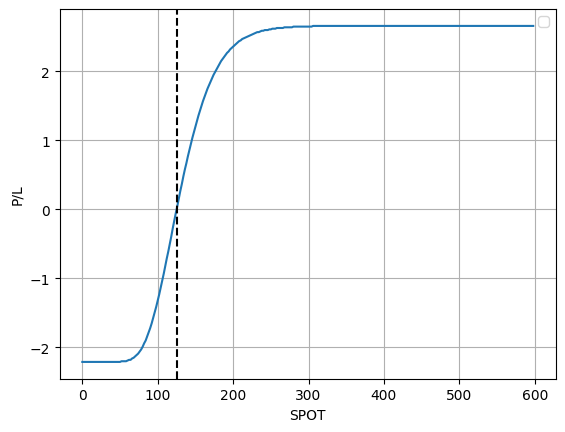

In [232]:
def bsm_premium(S, K, T, r, sigma, option_type='Call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
S = [i for i in range(0,600,2)]
T = 0.5
rfr = 0.0533
sigma = 0.4
K = [125,130]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [pay+bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
plt.plot(S,call_spread(atm,S,K,T,sigma,rfr))
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black",linestyle="--")
plt.legend()
plt.grid(True)

# Premiums for Same strike at different vol

Strikes :  [125, 130]
Breakout at  102  for Buy at  125  and Sell at  130 with profit of  0.01



C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


Breakout at  68  for Buy at  125  and Sell at  130 with profit of  0.01

Breakout at  40  for Buy at  125  and Sell at  130 with profit of  0.01



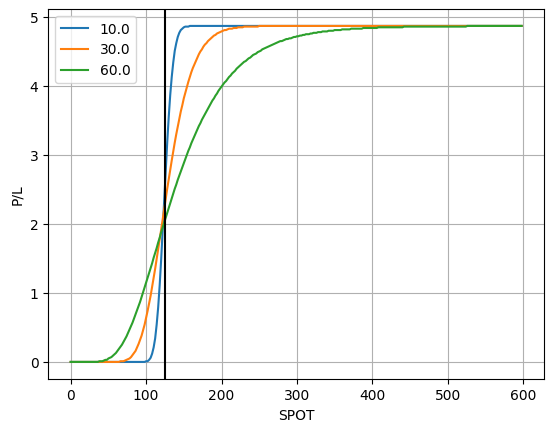

In [233]:
S = [i for i in range(0,600,2)]
T = 0.5
rfr = 0.0533
sigma = [0.1, 0.3, 0.6]
K = [125,130]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    # pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    # recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    # print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in sigma:
    a = call_spread(atm,S,K,T,i,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",K[0]," and Sell at ",K[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    plt.plot(S,a,label=i*100)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.legend()
plt.grid(True)

# Payoff for Same Strike at different Vol when Structure is applied At the Money

Strikes :  [125, 130]
initial investment of  -2.55  for strike  [125, 130]


Breakout at  156  for Buy at  125  and Sell at  130 with profit of  2.31

initial investment of  -2.29  for strike  [125, 130]
Breakout at  204  for Buy at  125  and Sell at  130 with profit of  2.51

initial investment of  -2.06  for strike  [125, 130]
Breakout at  272  for Buy at  125  and Sell at  130 with profit of  2.56



C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


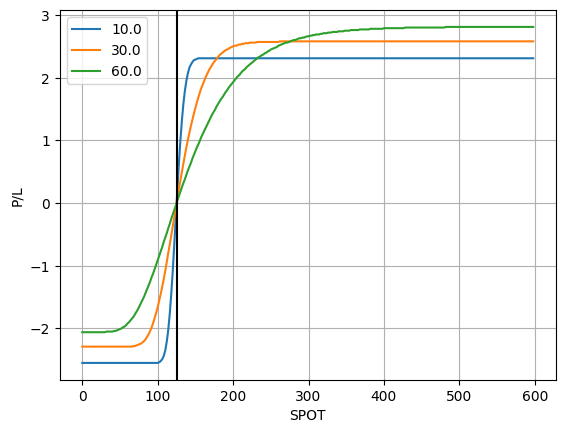

In [234]:
S = [i for i in range(0,600,2)]
T = 0.5
rfr = 0.0533
sigma = [0.1, 0.3, 0.6]
K = [125,130]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [pay+bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in sigma:
    a = call_spread(atm,S,K,T,i,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",K[0]," and Sell at ",K[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    plt.plot(S,a,label=i*100)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.legend()
plt.grid(True)

# Payoff for Same Strike at different TTE when Structure is applied At the Money

initial investment of  -2.15  for strike  [125, 130]
Breakout at  260  for Buy at  125  and Sell at  130 with profit of  2.38

initial investment of  -2.21  for strike  [125, 130]
Breakout at  234  for Buy at  125  and Sell at  130 with profit of  2.57

initial investment of  -2.14  for strike  [125, 130]
Breakout at  178  for Buy at  125  and Sell at  130 with profit of  2.81



C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


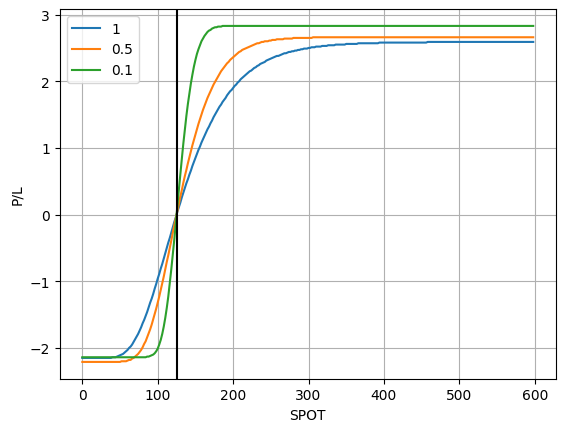

In [235]:
S = [i for i in range(0,600,2)]
T = [1,0.5,0.1]
rfr = 0.0533
sigma = 0.4
K = [125,130]
# print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [pay+bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in T:
    a = call_spread(atm,S,K,i,sigma,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",K[0]," and Sell at ",K[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    plt.plot(S,a,label=i)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.legend()
plt.grid(True)

# Premium for same strike for different TTE

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


Breakout at  42  for Buy at  125  and Sell at  130 with profit of  0.01

Breakout at  56  for Buy at  125  and Sell at  130 with profit of  0.01

Breakout at  90  for Buy at  125  and Sell at  130 with profit of  0.01



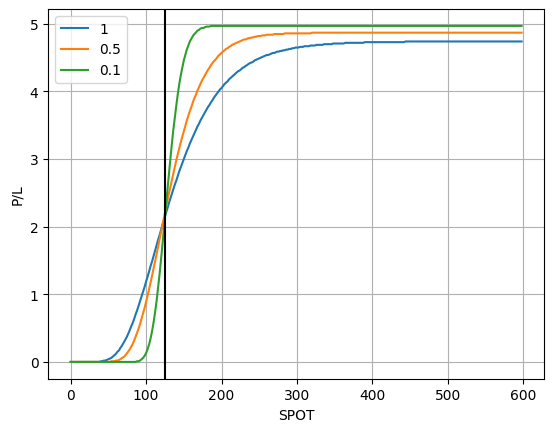

In [236]:
S = [i for i in range(0,600,2)]
T = [1,0.5,0.1]
rfr = 0.0533
sigma = 0.4
K = [125,130]
# print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    # pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    # recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    # print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in T:
    a = call_spread(atm,S,K,i,sigma,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",K[0]," and Sell at ",K[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    plt.plot(S,a,label=i)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.legend()
plt.grid(True)

# Payoff for Different Strikes when structure is issued when SPOT = 125

Strikes :  [[115, 120], [125, 130], [135, 140]]
initial investment of  -2.77  for strike  [115, 120]
Breakout at  218  for Buy at  [115, 120]  and Sell at  [125, 130] with profit of  2.02

initial investment of  -2.21  for strike  [125, 130]
Breakout at  234  for Buy at  [115, 120]  and Sell at  [125, 130] with profit of  2.57

initial investment of  -1.71  for strike  [135, 140]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


Breakout at  246  for Buy at  [115, 120]  and Sell at  [125, 130] with profit of  3.05



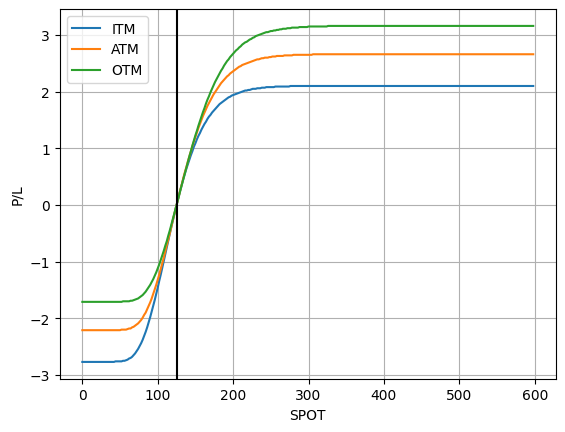

In [237]:
S = [i for i in range(0,600,2)]
T = 0.5
rfr = 0.0533
sigma = 0.4
K = [[115,120],[125,130],[135,140]]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [pay+bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in range(len(K)):
    a = call_spread(atm,S,K[i],T,sigma,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",K[0]," and Sell at ",K[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    if K[i][1]<atm:
        l = "ITM"
    elif K[i][0]>atm:
        l = "OTM"
    else:
        l = "ATM"
    plt.plot(S,a,label=l)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.legend()
plt.grid(True)

# Premium for Different Strikes when structure is issued when SPOT = 125

Strikes :  [[115, 120], [125, 130], [135, 140]]
Breakout at  52  for Buy at  [115, 120]  and Sell at  [125, 130] with profit of  0.01



C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


Breakout at  56  for Buy at  [115, 120]  and Sell at  [125, 130] with profit of  0.01

Breakout at  62  for Buy at  [115, 120]  and Sell at  [125, 130] with profit of  0.01



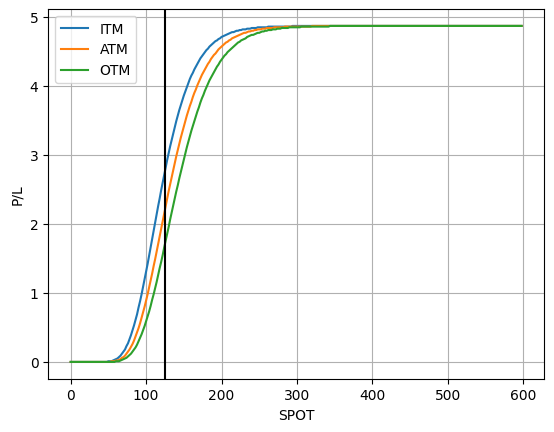

In [238]:
S = [i for i in range(0,600,2)]
T = 0.5
rfr = 0.0533
sigma = 0.4
K = [[115,120],[125,130],[135,140]]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    # pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    # recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    # print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in range(len(K)):
    a = call_spread(atm,S,K[i],T,sigma,rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Breakout at ",S[j]," for Buy at ",K[0]," and Sell at ",K[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    if K[i][1]<atm:
        l = "ITM"
    elif K[i][0]>atm:
        l = "OTM"
    else:
        l = "ATM"
    plt.plot(S,a,label=l)
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.legend()
plt.grid(True)

# Payoff for same strike when vol is increasing and time is decreasing

Strikes :  [125, 130]
initial investment of  -2.9  for strike  [125, 130]
Maxout at  162  for Buy at  125  and Sell at  130 with profit of  1.83

initial investment of  -2.21  for strike  [125, 130]
Maxout at  234  for Buy at  125  and Sell at  130 with profit of  2.57

initial investment of  -2.13  for strike  [125, 130]
Maxout at  224  for Buy at  125  and Sell at  130 with profit of  2.76



C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\1036196099.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


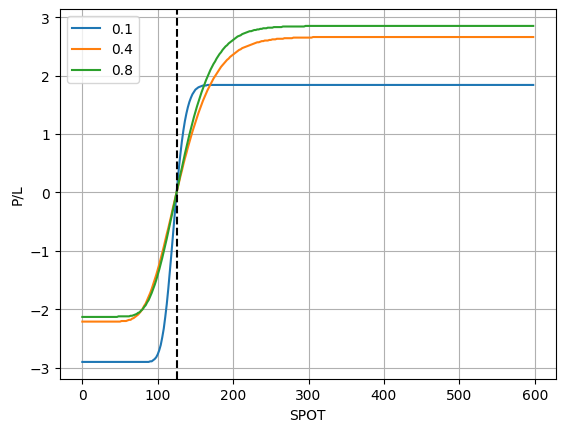

In [239]:
S = [i for i in range(0,600,2)]
T = [1,0.5,0.1]
rfr = 0.0533
sigma = [0.1,0.4,0.8]
K = [125,130]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    print("initial investment of ",round(pay+recv,2)," for strike ",K)
    payoff_1 = [pay+bsm_premium(i,K[0],T,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],T,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i],2) for i in range(len(payoff_1))]
    return net
atm = 125
res = []
for i in range(len(sigma)):
    a = call_spread(atm,S,K,T[i],sigma[i],rfr)
    for j in range(1,len(a)):
        if round(a[j-1],2)==round(a[j],2) and a[j-1]>0:
            print("Maxout at ",S[j]," for Buy at ",K[0]," and Sell at ",K[1], "with profit of ",a[j])
            print()
            # plt.axvline(x=S[j],linestyle="--")
            break
    plt.plot(S,a,label=sigma[i])
    for j in range(len(a)):
        try:
            res[j]+=a[j]
        except:
            res.append(a[j])
# plt.plot(S,res)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black",linestyle="--")
plt.legend()
plt.grid(True)

# Greeks for Same Strike at different Spot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


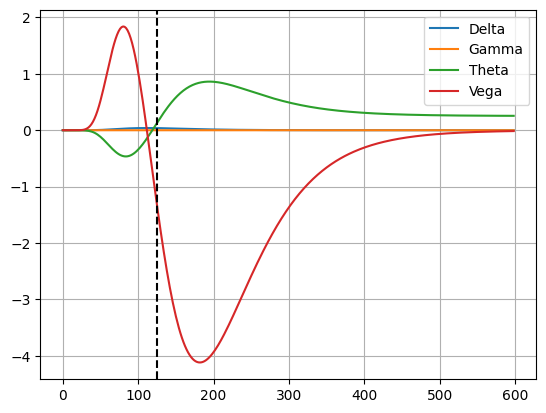

In [240]:
S = [i for i in range(0,600,2)]
K = [125,130]
T = 1
rfr = 0.0533
sigma = 0.4
atm = 125
def net_greek(atm,S,K,T,rfr,sigma,opt="Call",greek="Delta"):
    buy = [bsm_greeks(i,K[0],T,rfr,sigma,opt,greek) for i in S]
    sell = [-bsm_greeks(i,K[1],T,rfr,sigma,opt,greek) for i in S]
    res = [buy[i]+sell[i] for i in range(len(buy))]
    return res
plt.plot(S,net_greek(atm,S,K,T,rfr,sigma,"Call","Delta"),label="Delta")

plt.plot(S,net_greek(atm,S,K,T,rfr,sigma,"Call","Gamma"),label="Gamma")

plt.plot(S,net_greek(atm,S,K,T,rfr,sigma,"Call","Theta"),label="Theta")

plt.plot(S,net_greek(atm,S,K,T,rfr,sigma,"Call","Vega"),label="Vega")

plt.grid(True)
plt.legend()
plt.axvline(x = atm , linestyle = "--", color = "black")


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


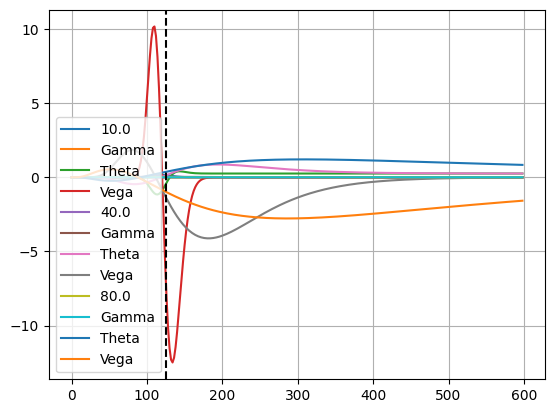

In [241]:
S = [i for i in range(0,600,2)]
K = [125,130]
T = 1
rfr = 0.0533
sigma = [0.1,0.4,0.8]
atm = 125
def net_greek(atm,S,K,T,rfr,sigma,opt="Call",greek="Delta"):
    buy = [bsm_greeks(i,K[0],T,rfr,sigma,opt,greek) for i in S]
    sell = [-bsm_greeks(i,K[1],T,rfr,sigma,opt,greek) for i in S]
    res = [buy[i]+sell[i] for i in range(len(buy))]
    return res
for i in sigma:
    plt.plot(S,net_greek(atm,S,K,T,rfr,i,"Call","Delta"),label=i*100)

    plt.plot(S,net_greek(atm,S,K,T,rfr,i,"Call","Gamma"),label="Gamma")

    plt.plot(S,net_greek(atm,S,K,T,rfr,i,"Call","Theta"),label="Theta")

    plt.plot(S,net_greek(atm,S,K,T,rfr,i,"Call","Vega"),label="Vega")

plt.grid(True)
plt.legend()
plt.axvline(x = atm , linestyle = "--", color = "black")


# Spread Greeks for ATM different Vol

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


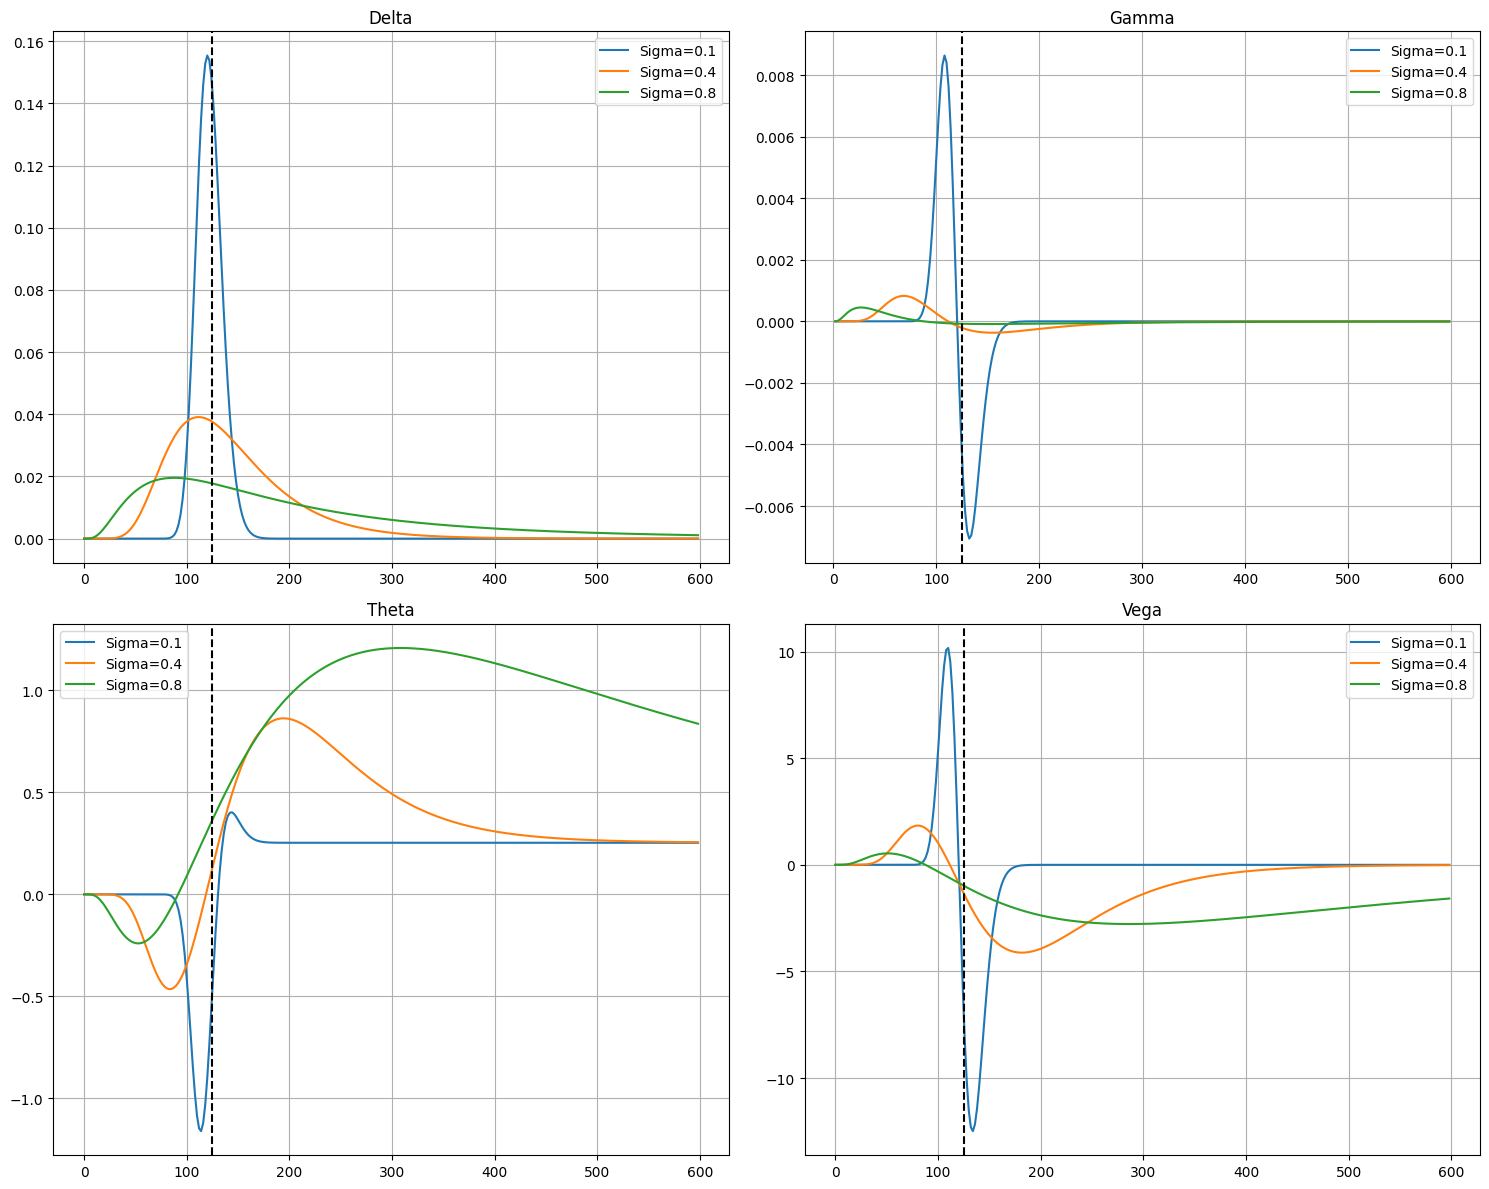

In [272]:
import matplotlib.pyplot as plt

S = [i for i in range(0, 600, 2)]
K = [125, 130]
T = 1
rfr = 0.0533
sigma = [0.1, 0.4, 0.8]
atm = 125

def net_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    sell = [-bsm_greeks(i, K[1], T, rfr, sigma, opt, greek) for i in S]
    res = [buy[i] + sell[i] for i in range(len(buy))]
    return res

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in sigma:
        axs[idx].plot(S, net_greek(atm, S, K, T, rfr, i, "Call", greek), label=f"Sigma={i}")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()


# Spread Greek for Same Strike different TTE

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


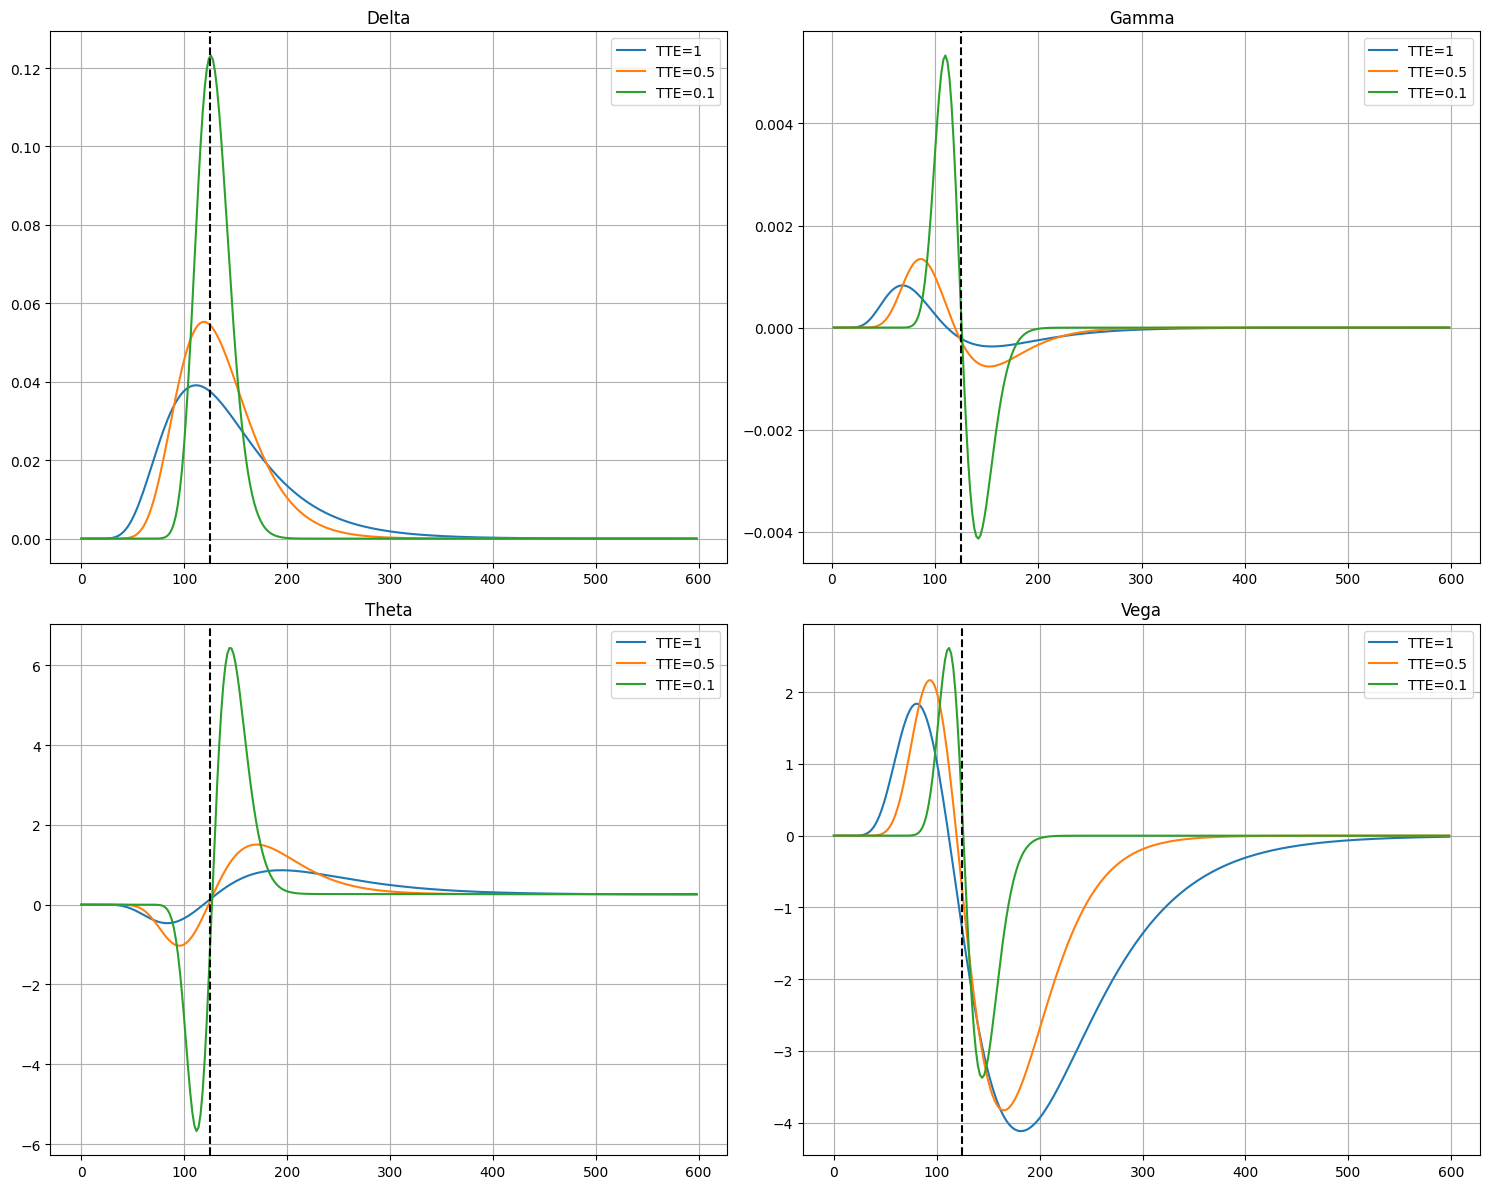

In [271]:
import matplotlib.pyplot as plt

S = [i for i in range(0, 600, 2)]
K = [125, 130]
T = [1,0.5,0.1]
rfr = 0.0533
sigma = 0.4
atm = 125

def net_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    sell = [-bsm_greeks(i, K[1], T, rfr, sigma, opt, greek) for i in S]
    res = [buy[i] + sell[i] for i in range(len(buy))]
    return res

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in T:
        axs[idx].plot(S, net_greek(atm, S, K, i, rfr, sigma, "Call", greek), label=f"TTE={i}")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()


# Spread Greek for Same Strike for Decreasing TTE and Increasing Vol

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


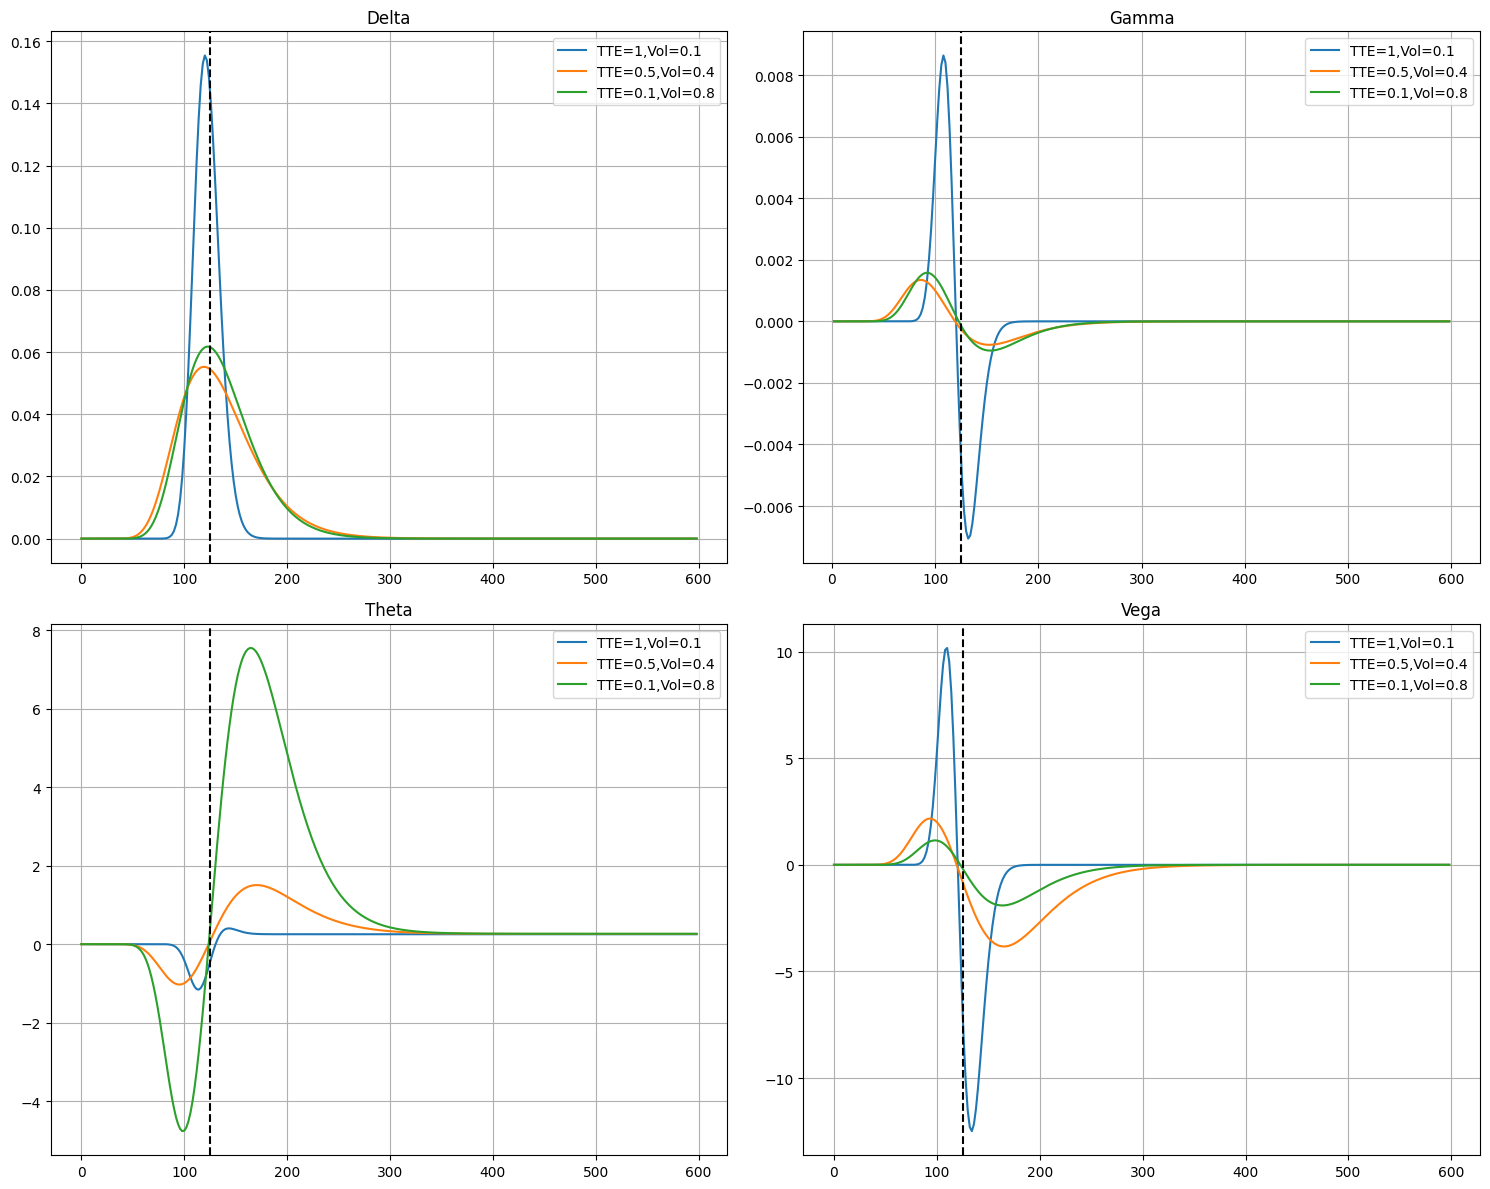

In [270]:
import matplotlib.pyplot as plt

S = [i for i in range(0, 600, 2)]
K = [125, 130]
T = [1,0.5,0.1]
rfr = 0.0533
sigma = [0.1,0.4,0.8]
atm = 125

def net_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    sell = [-bsm_greeks(i, K[1], T, rfr, sigma, opt, greek) for i in S]
    res = [buy[i] + sell[i] for i in range(len(buy))]
    return res

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in range(len(T)):
        axs[idx].plot(S, net_greek(atm, S, K, T[i], rfr, sigma[i], "Call", greek), label=f"TTE={T[i]},Vol={sigma[i]}")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()


# Spread Greek for Different Strikes

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


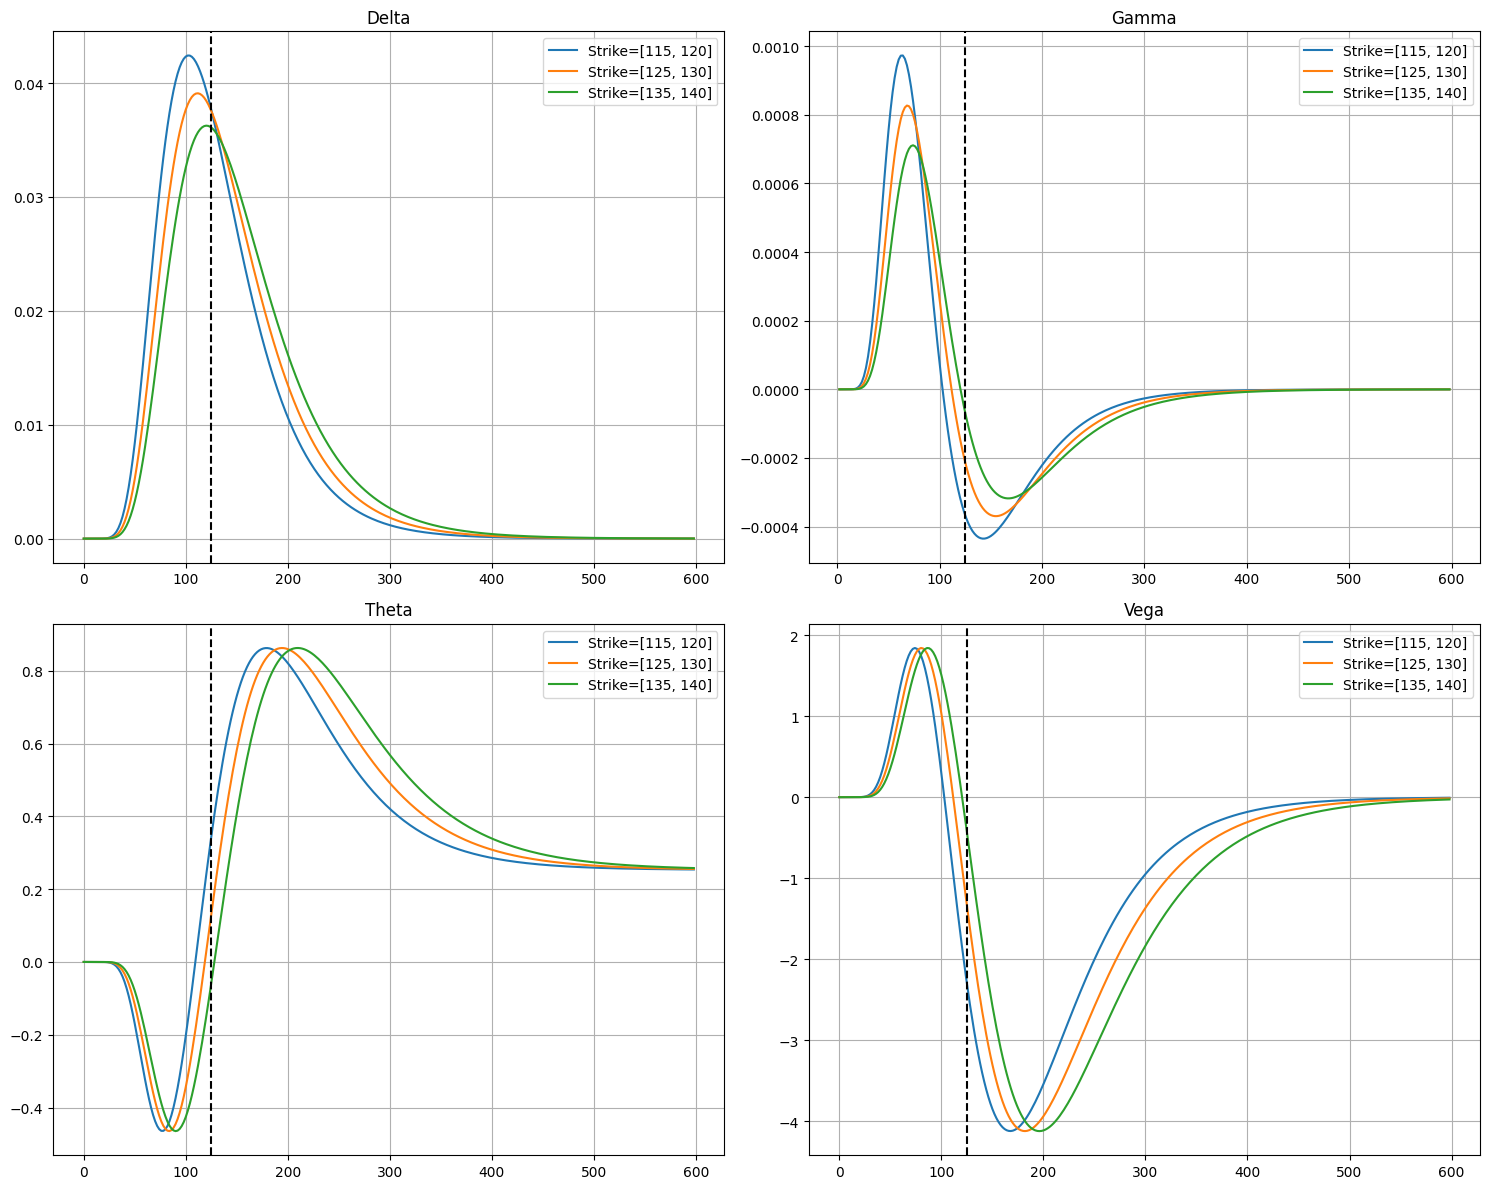

In [269]:
import matplotlib.pyplot as plt

S = [i for i in range(0, 600, 2)]
K = [[115,120],[125, 130],[135,140]]
T = 1
rfr = 0.0533
sigma = 0.4
atm = 125

def net_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    sell = [-bsm_greeks(i, K[1], T, rfr, sigma, opt, greek) for i in S]
    res = [buy[i] + sell[i] for i in range(len(buy))]
    return res

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in K:
        axs[idx].plot(S, net_greek(atm, S, i, T, rfr, sigma, "Call", greek), label=f"Strike={i}")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()


# FLY

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\43615726.py:6: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Strikes :  [120, 125, 130]


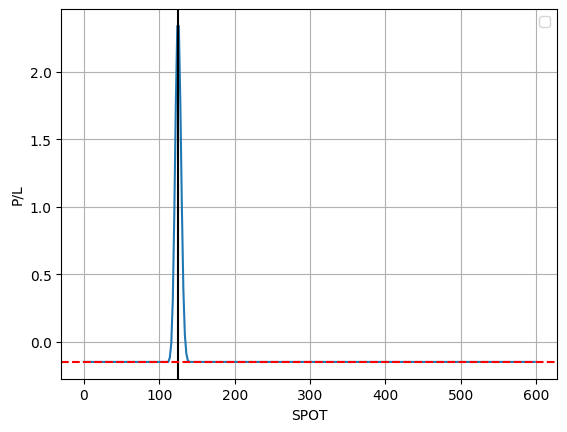

In [263]:
S = [i for i in range(0,600,2)]
T = 1
rfr = 0.0533
sigma = 0.5
K = [120,125,130]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def call_spread(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay_1 = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    pay_2 = -bsm_premium(atm,K[2],T,rfr,sigma,"Call")
    recv = bsm_premium(atm,K[1],T,rfr,sigma,"Call")*2
    p=round(pay_1+pay_2+recv,2)
    payoff_1 = [pay_1+bsm_premium(i,K[0],1/365,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv-bsm_premium(i,K[1],1/365,rfr,sigma,"Call")*2 for i in S]
    payoff_3 = [pay_2+bsm_premium(i,K[2],1/365,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i]+payoff_3[i],2) for i in range(len(payoff_1))]
    return net,p
atm = 125
r,p = call_spread(atm,S,K,T,sigma,rfr)
plt.plot(S,r)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.axhline(y=p,color = "red",linestyle ="--")
plt.legend()
plt.grid(True)

Strikes :  [120, 125, 130]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


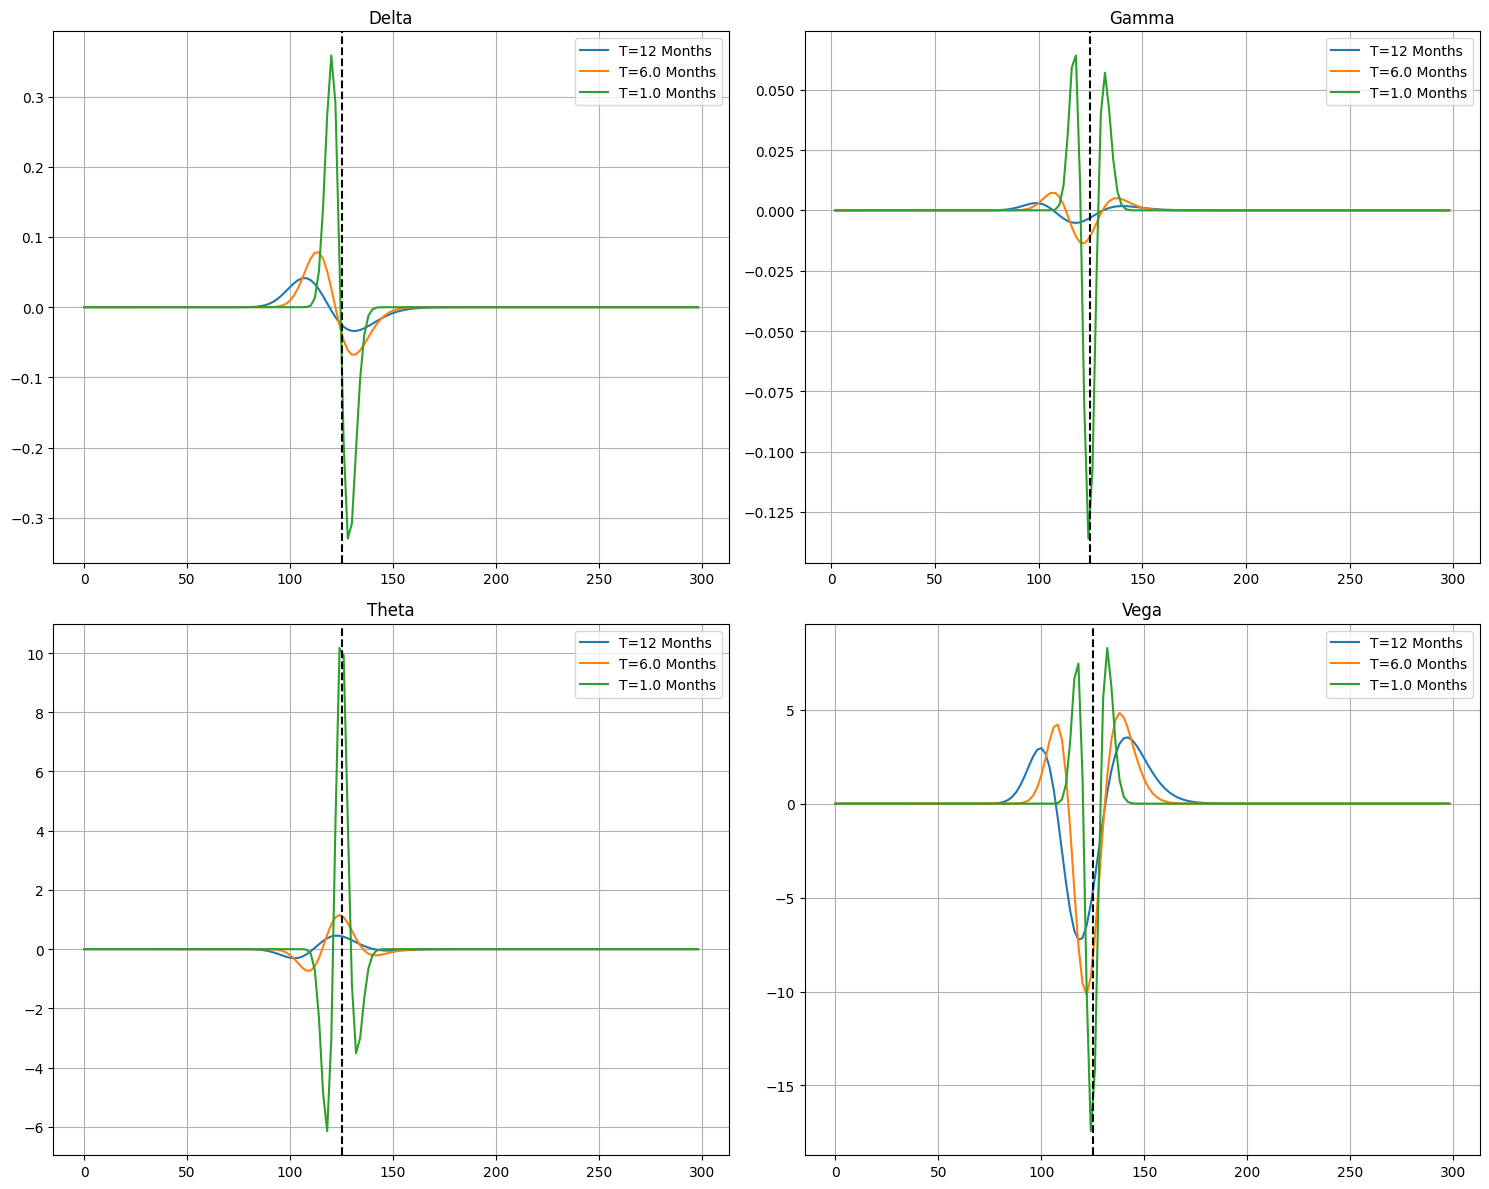

In [268]:
S = [i for i in range(0,300,2)]
T = [1,1/2,1/12]
rfr = 0.0533
sigma = 0.1
K = [120,125,130]
print("Strikes : ",K)
def fly_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    sell = [-bsm_greeks(i, K[1], T, rfr, sigma, opt, greek)*2 for i in S]
    buy_2 = [bsm_greeks(i, K[2], T, rfr, sigma, opt, greek) for i in S]
    res = [buy[i] + sell[i] + buy_2[i] for i in range(len(buy))]
    return res
atm =125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in T:
        axs[idx].plot(S, fly_greek(atm, S, K, i, rfr, sigma, "Call", greek), label=f"T={i*12} Months")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()

Strikes :  [120, 125, 130]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:5: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_4708\2249360065.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return norm.pdf(d1) / (S * sigma * np.sqrt(T))


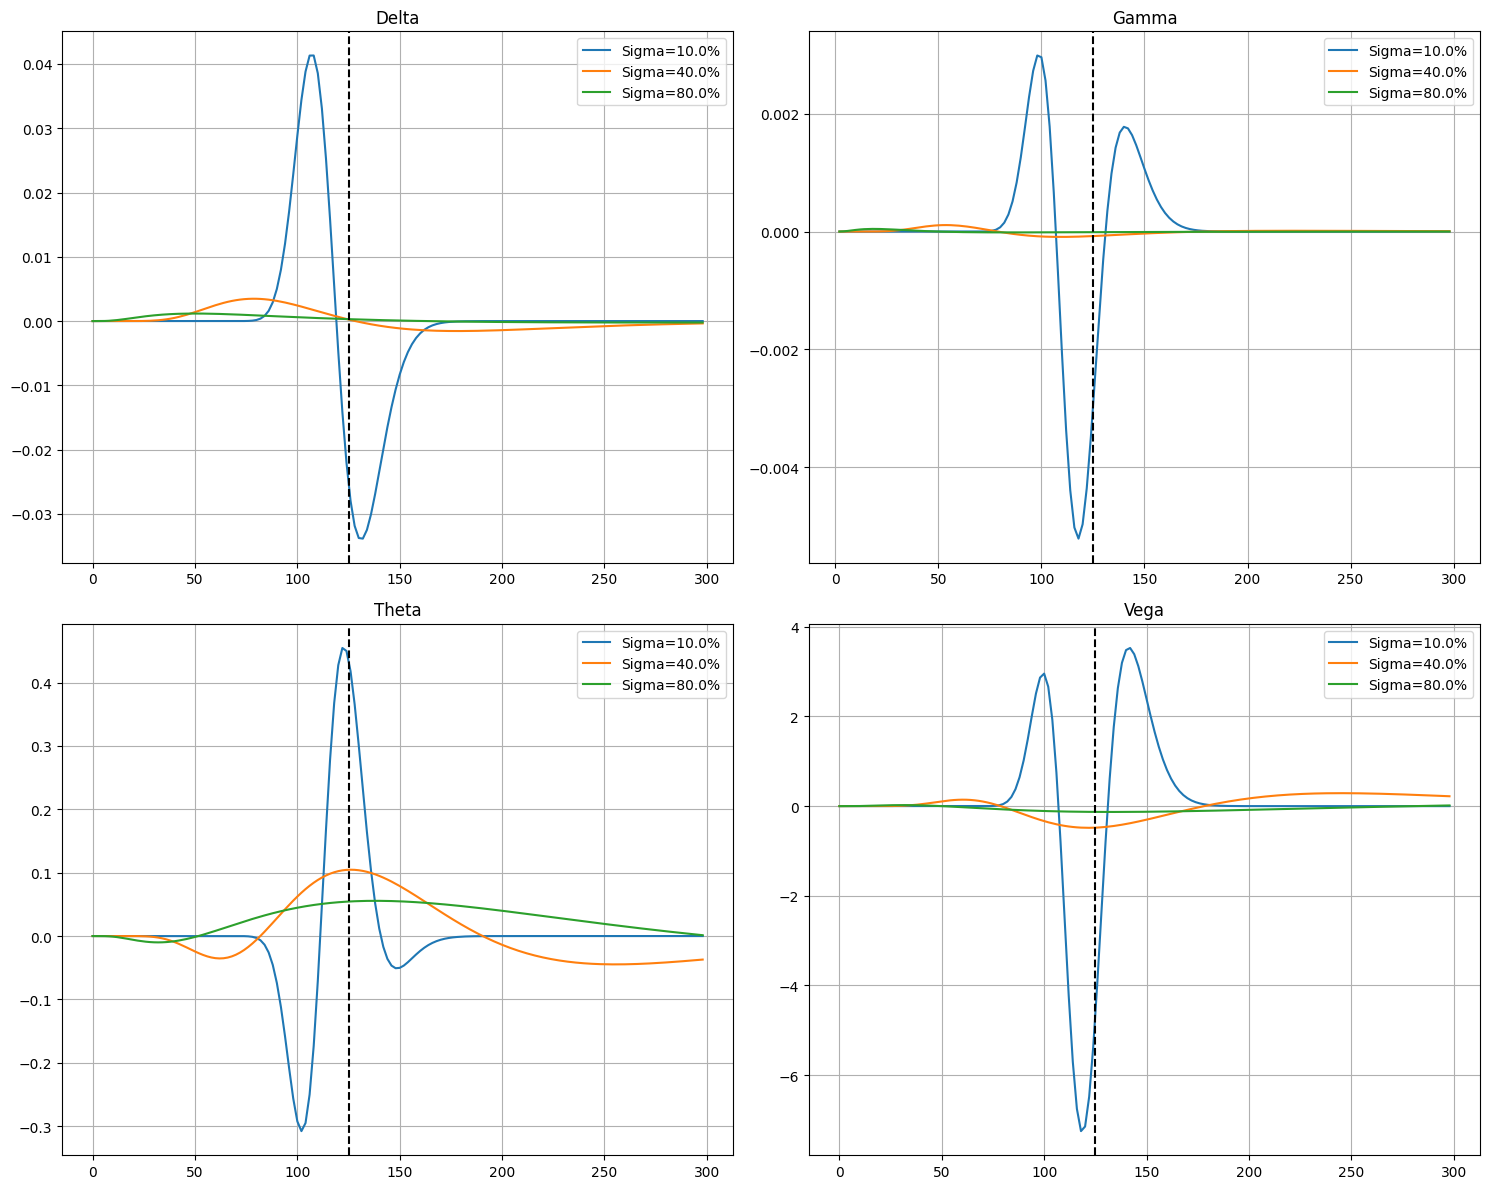

In [267]:
S = [i for i in range(0,300,2)]
T = 1
rfr = 0.0533
sigma = [0.1,0.4,0.8]
K = [120,125,130]
print("Strikes : ",K)
def fly_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    sell = [-bsm_greeks(i, K[1], T, rfr, sigma, opt, greek)*2 for i in S]
    buy_2 = [bsm_greeks(i, K[2], T, rfr, sigma, opt, greek) for i in S]
    res = [buy[i] + sell[i] + buy_2[i] for i in range(len(buy))]
    return res
atm =125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in sigma:
        axs[idx].plot(S, fly_greek(atm, S, K, T, rfr, i, "Call", greek), label=f"Sigma={i*100}%")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()

Strikes :  [120, 125, 130]


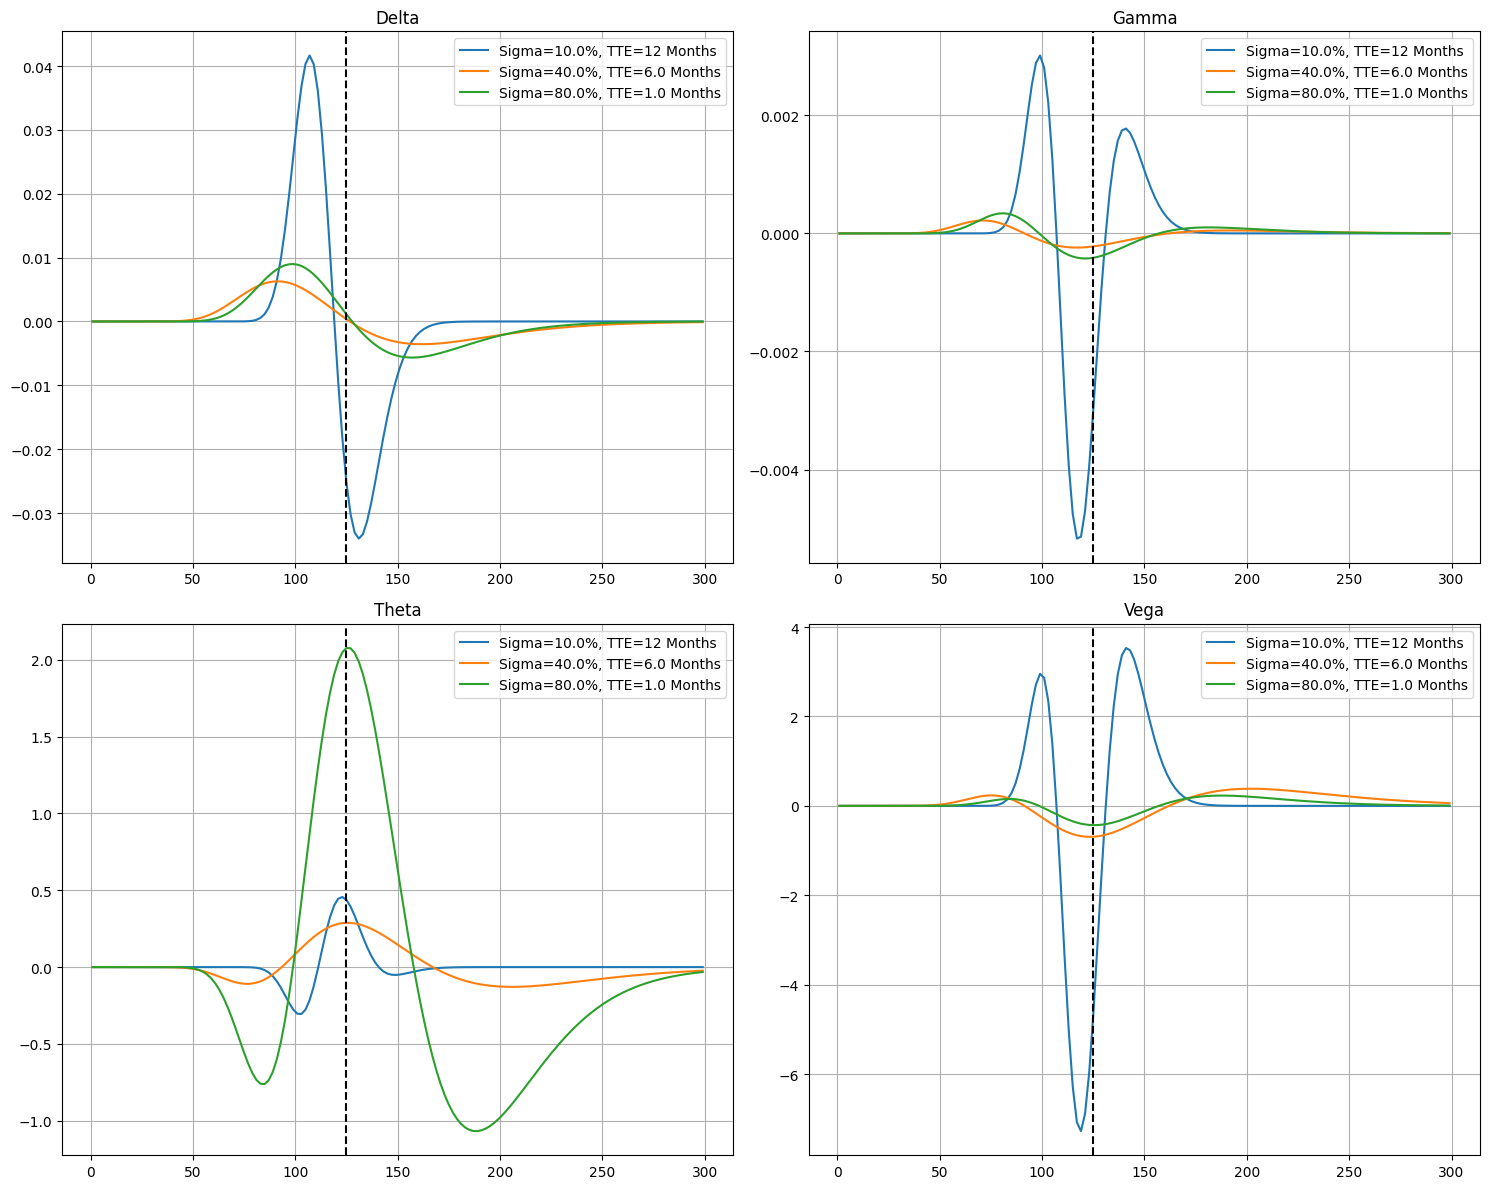

In [266]:
S = [i for i in range(1,300,2)]
T = [1,1/2,1/12]
rfr = 0.0533
sigma = [0.1,0.4,0.8]
K = [120,125,130]
print("Strikes : ",K)
def fly_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    sell = [-bsm_greeks(i, K[1], T, rfr, sigma, opt, greek)*2 for i in S]
    buy_2 = [bsm_greeks(i, K[2], T, rfr, sigma, opt, greek) for i in S]
    res = [buy[i] + sell[i] + buy_2[i] for i in range(len(buy))]
    return res
atm =125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in range(len(sigma)):
        axs[idx].plot(S, fly_greek(atm, S, K, T[i], rfr, sigma[i], "Call", greek), label=f"Sigma={sigma[i]*100}%, TTE={T[i]*12} Months")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()

# Straddle

125 --> 11.056752636702463


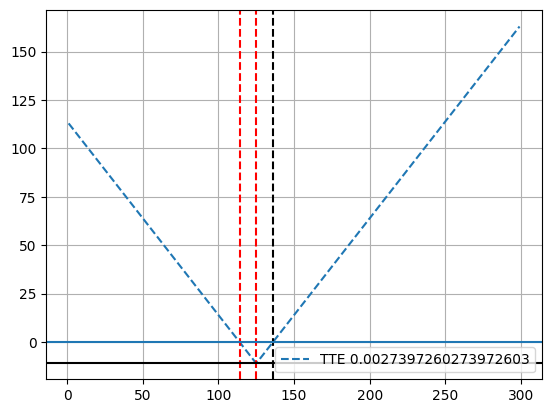

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import exp
def bsm_premium(S, K, T, r, sigma, option_type='Call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def atm_straddle(atm, S, K, T, tte,sigma, rfr):
    p1 = bsm_premium(atm,K,T,rfr,sigma,"Call")
    p2 = bsm_premium(atm,K,T,rfr,sigma,"Put")
    print(K,"-->",p1+p2)
    p = p1+p2
    pnl_1 = [bsm_premium(i,K,tte,rfr,sigma,"Call") for i in S]
    pnl_2 = [bsm_premium(i,K,tte,rfr,sigma,"Put") for i in S]
    net = [(pnl_1[i]+pnl_2[i])-p for i in range(len(S))]
    return net,p
atm = 125
K = 125
S = [i for i in range(1,300,1)]
T = 1
tte = [1/365]
sigma = 0.1
rfr = 0.0533
for i in tte:
    r,p = atm_straddle(atm,S,K,T,i,sigma,rfr)
    plt.plot(S,r,label=f"TTE {i}",linestyle="--")
plt.grid(True)
plt.legend()
plt.axvline(x=atm,color="Red",linestyle="--")
plt.axvline(x=atm+p,color="Black",linestyle="--")
plt.axvline(x=atm-p,color="Red",linestyle="--")
plt.axhline(y=-p,color="Black")
plt.axhline(y=0)



Strikes :  125


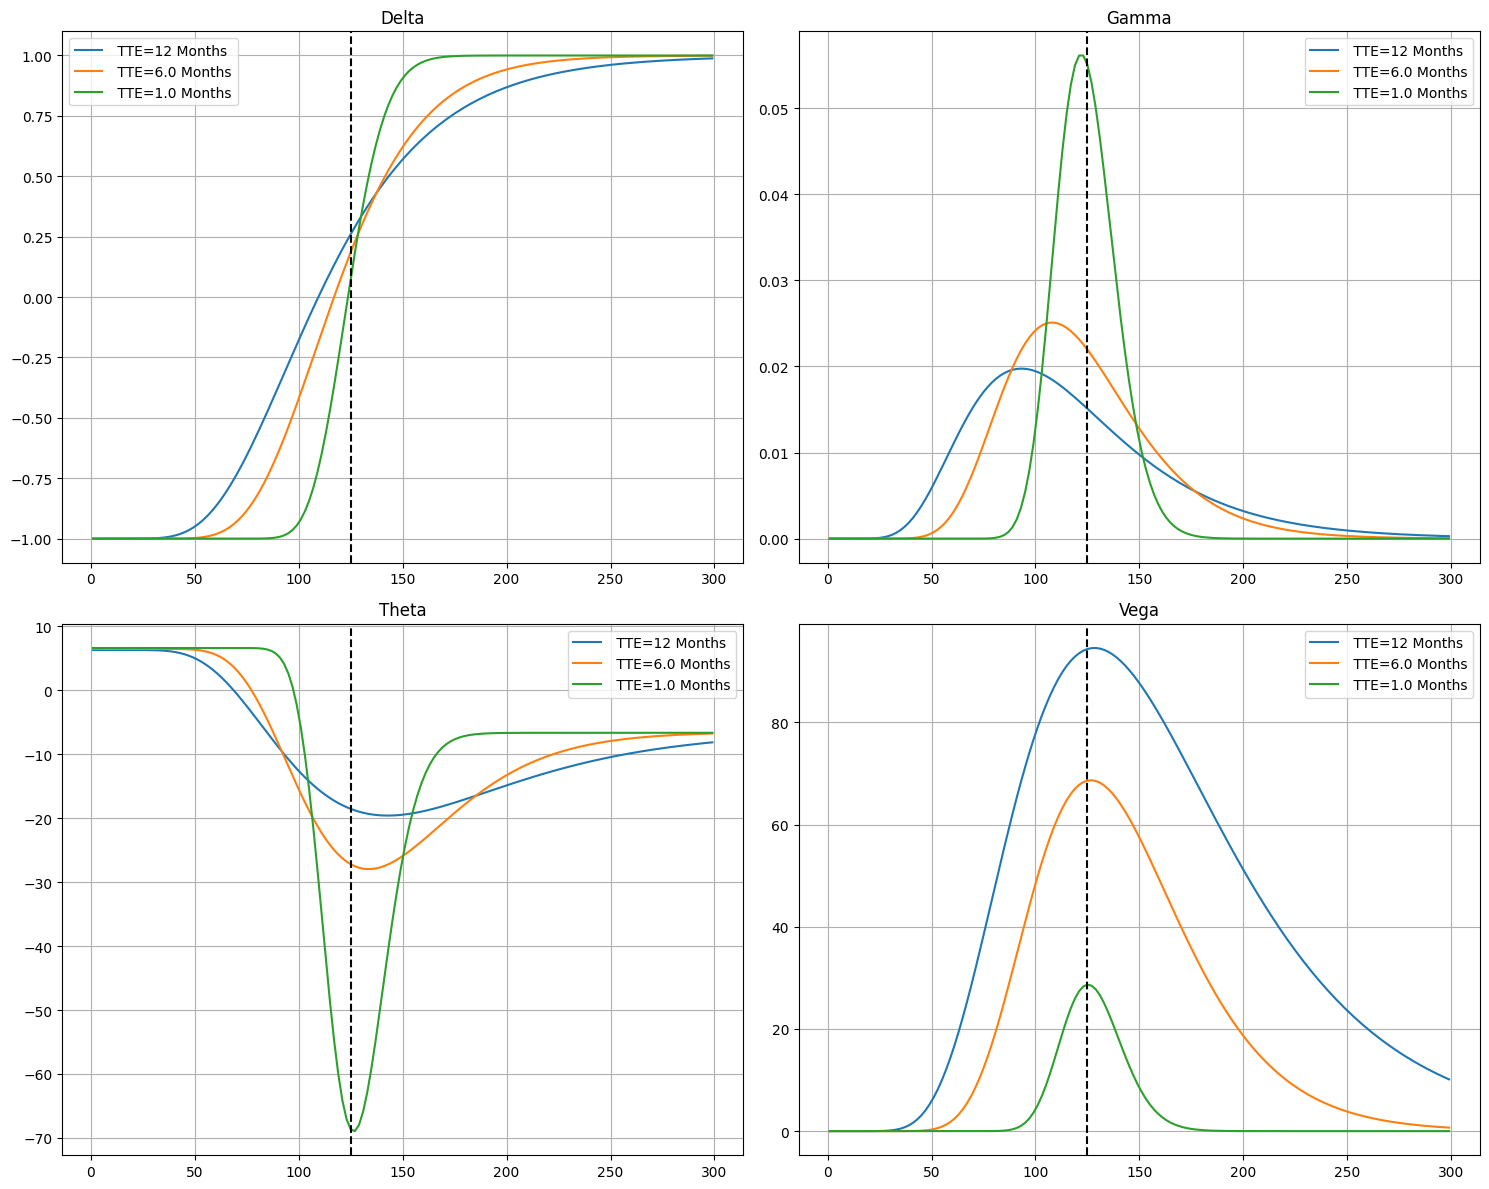

In [276]:
S = [i for i in range(1,300,2)]
T = [1,1/2,1/12]
rfr = 0.0533
sigma = 0.4
K = 125
print("Strikes : ",K)
def straddle_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K, T, rfr, sigma, opt, greek) for i in S]
    buy_2 = [bsm_greeks(i, K, T, rfr, sigma, "Put", greek) for i in S]
    res = [buy[i] + buy_2[i] for i in range(len(buy))]
    return res
atm =125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in range(len(T)):
        axs[idx].plot(S, straddle_greek(atm, S, K, T[i], rfr, sigma, "Call", greek), label=f" TTE={T[i]*12} Months")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()

Strikes :  125


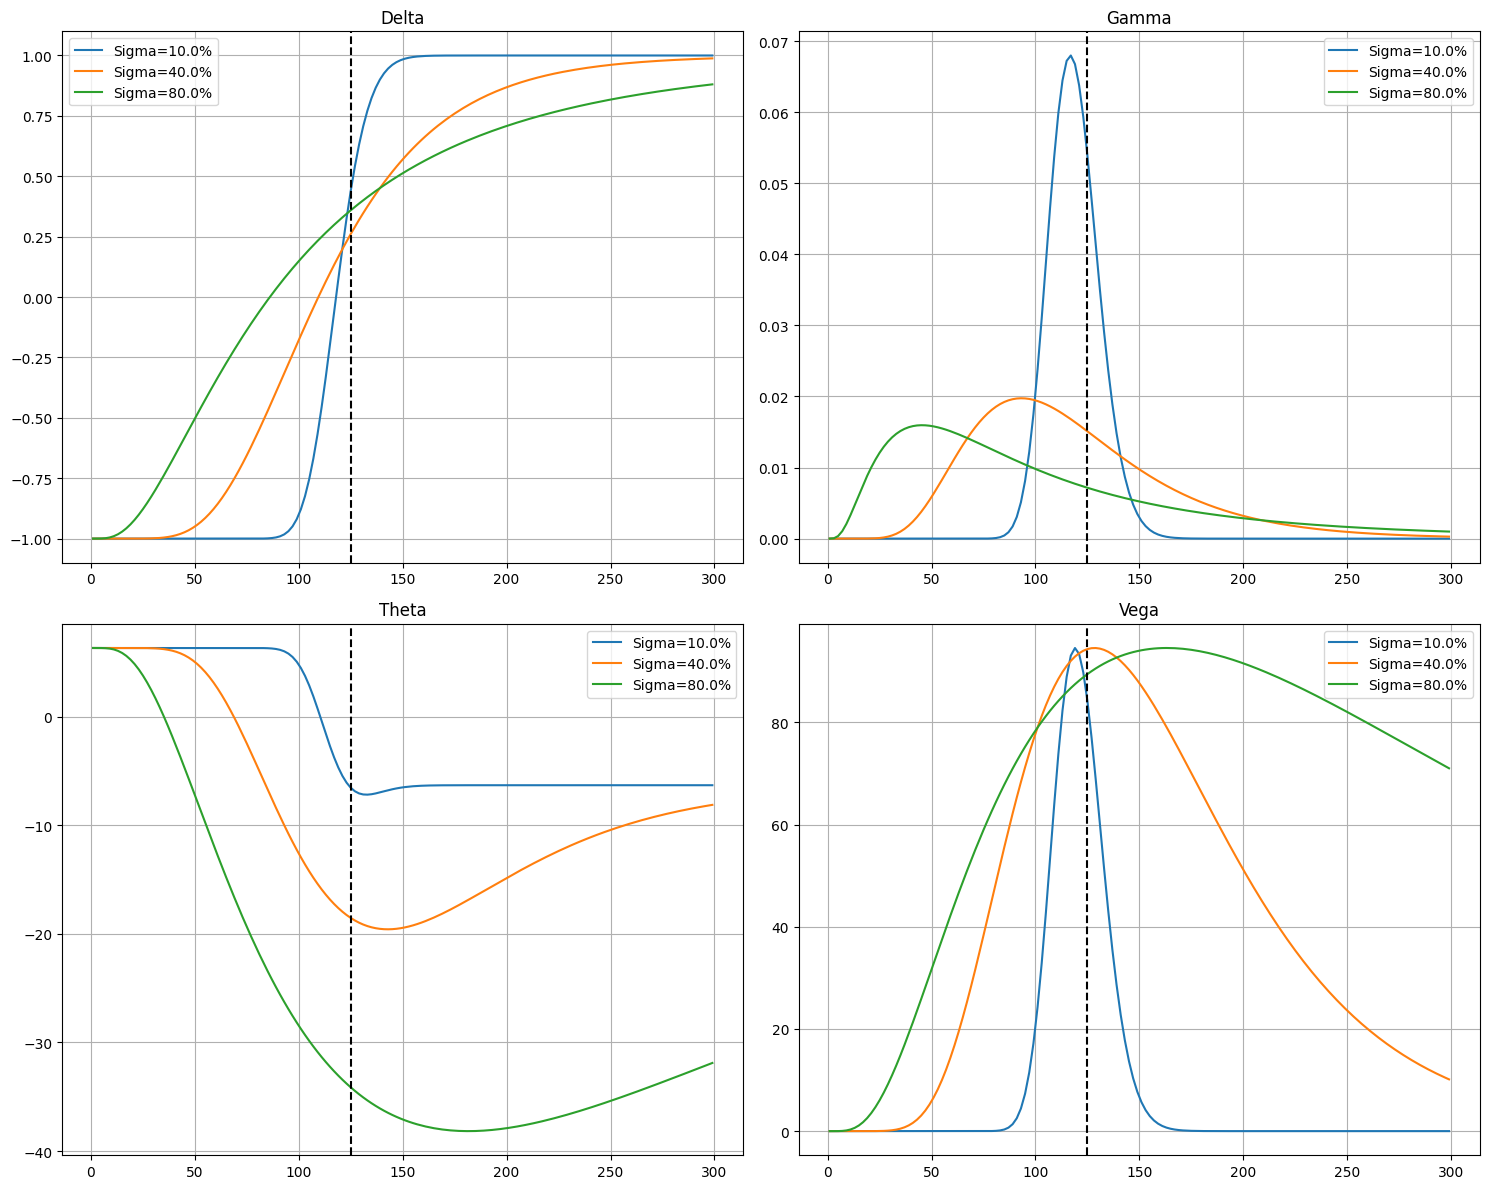

In [274]:
S = [i for i in range(1,300,2)]
T = 1
rfr = 0.0533
sigma = [0.1,0.4,0.8]
K = 125
print("Strikes : ",K)
def straddle_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K, T, rfr, sigma, opt, greek) for i in S]
    buy_2 = [bsm_greeks(i, K, T, rfr, sigma, "Put", greek) for i in S]
    res = [buy[i] + buy_2[i] for i in range(len(buy))]
    return res
atm =125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in range(len(sigma)):
        axs[idx].plot(S, straddle_greek(atm, S, K, T, rfr, sigma[i], "Call", greek), label=f"Sigma={sigma[i]*100}%")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()

Strikes :  125


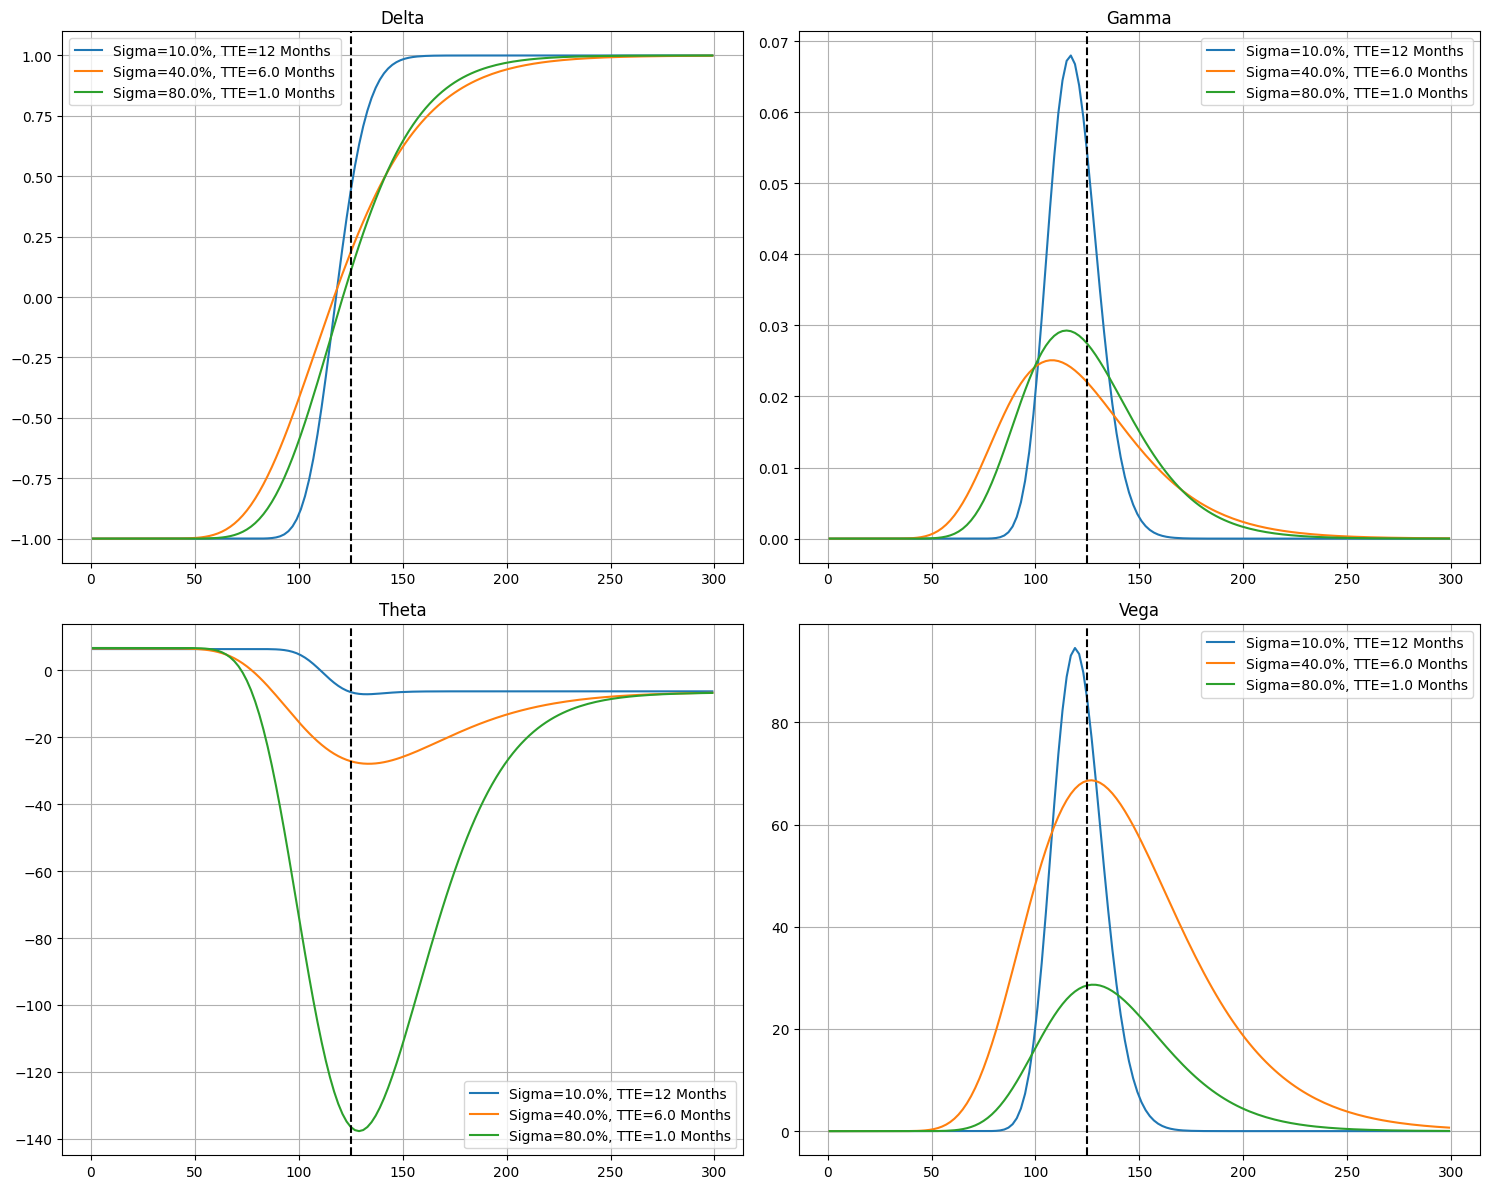

In [273]:
S = [i for i in range(1,300,2)]
T = [1,1/2,1/12]
rfr = 0.0533
sigma = [0.1,0.4,0.8]
K = 125
print("Strikes : ",K)
def straddle_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K, T, rfr, sigma, opt, greek) for i in S]
    buy_2 = [bsm_greeks(i, K, T, rfr, sigma, "Put", greek) for i in S]
    res = [buy[i] + buy_2[i] for i in range(len(buy))]
    return res
atm =125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in range(len(sigma)):
        axs[idx].plot(S, straddle_greek(atm, S, K, T[i], rfr, sigma[i], "Call", greek), label=f"Sigma={sigma[i]*100}%, TTE={T[i]*12} Months")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()

# Strangle

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[140, 110] --> 2.328426773207916


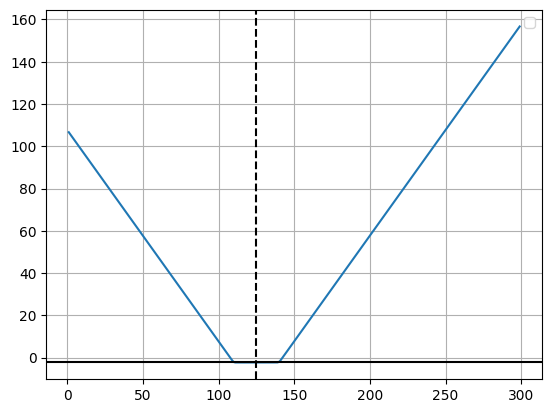

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import exp
def bsm_premium(S, K, T, r, sigma, option_type='Call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'Call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def strangle(atm, S, K, T, tte,sigma, rfr):
    p1 = bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    p2 = bsm_premium(atm,K[1],T,rfr,sigma,"Put")
    print(K,"-->",p1+p2)
    p = p1+p2
    pnl_1 = [bsm_premium(i,K[0],1/365,rfr,sigma,"Call") for i in S]
    pnl_2 = [bsm_premium(i,K[1],1/365,rfr,sigma,"Put") for i in S]
    net = [(pnl_1[i]+pnl_2[i])-p for i in range(len(S))]
    return net,p
atm = 125
K = [140,110]
S = [i for i in range(1,300,1)]
T = 1
tte = [1/365]
sigma = 0.1
rfr = 0.0533
for i in tte:
    r,p = strangle(atm,S,K,T,i,sigma,rfr)
    plt.plot(S,r)
plt.grid(True)
plt.legend()
plt.axvline(x=atm,color = 'black',linestyle="--")
plt.axhline(y=-p,color="Black")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Strikes :  [130, 120]


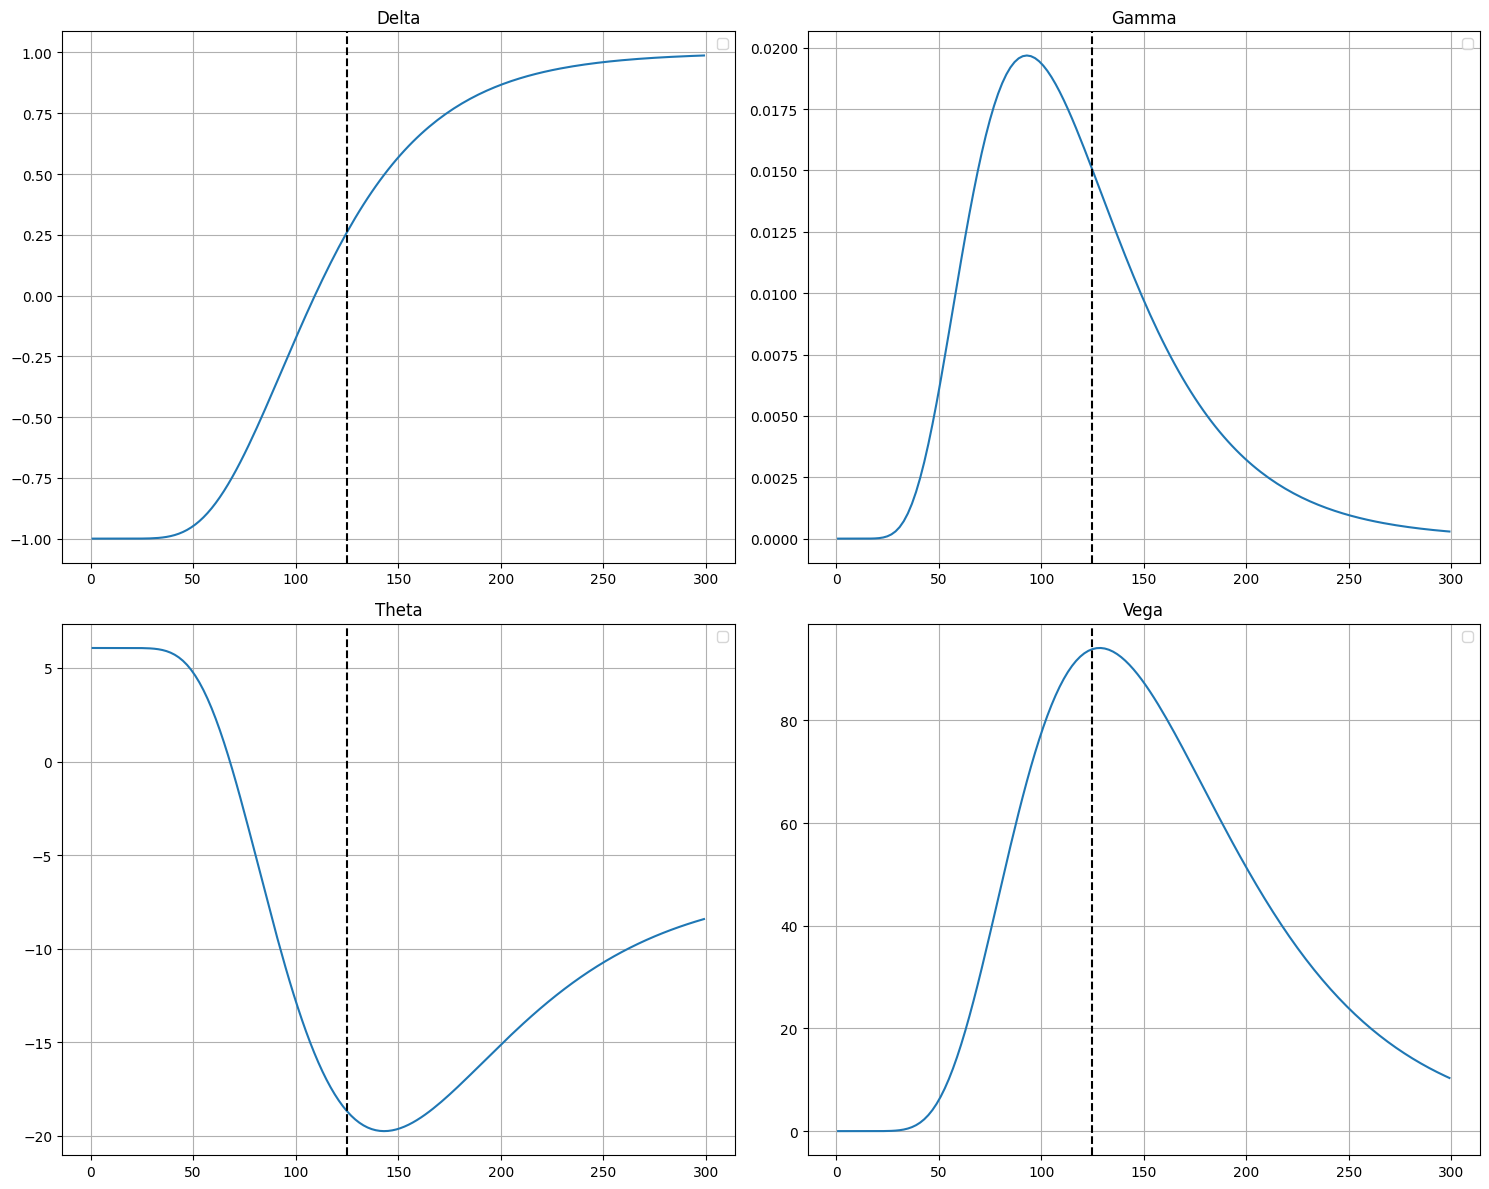

In [287]:
S = [i for i in range(1,300,2)]
T = 1
rfr = 0.0533
sigma = 0.4
K = [130,120]
print("Strikes : ",K)
def straddle_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    buy = [bsm_greeks(i, K[0], T, rfr, sigma, opt, greek) for i in S]
    buy_2 = [bsm_greeks(i, K[1], T, rfr, sigma, "Put", greek) for i in S]
    res = [buy[i] + buy_2[i] for i in range(len(buy))]
    return res
atm =125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    
    axs[idx].plot(S, straddle_greek(atm, S, K, T, rfr, sigma, "Call", greek))

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()

# CONDOR

Strikes :  [85, 110, 140, 165]
-16.869999999999997


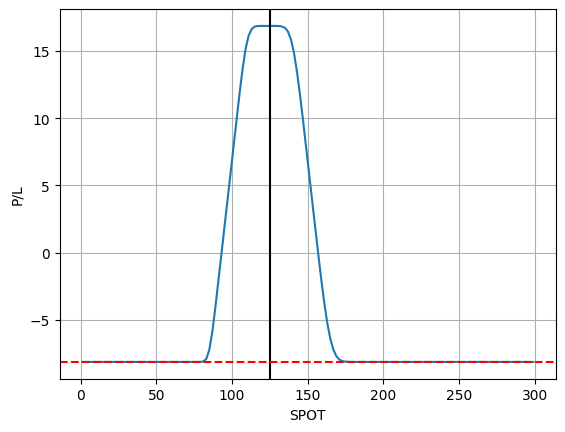

In [328]:
S = [i for i in range(1,300,2)]
T = 1
rfr = 0.0533
sigma = 0.5
K = [85,110,140,165]
print("Strikes : ",K)
#call function for each strike and returning net payoff for each spread
def condor(atm,S,K,T,sigma,rfr):
    #Buy First Strike(lower) | Sell Second Strike(higher)
    pay_1 = -bsm_premium(atm,K[0],T,rfr,sigma,"Call")
    pay_2 = -bsm_premium(atm,K[3],T,rfr,sigma,"Call")
    recv_1 = bsm_premium(atm,K[1],T,rfr,sigma,"Call")
    recv_2 = bsm_premium(atm,K[2],T,rfr,sigma,"Call")
    p=round(pay_1+pay_2+recv_1+recv_2,2)
    payoff_1 = [pay_1+bsm_premium(i,K[0],1/365,rfr,sigma,"Call") for i in S]
    payoff_2 = [recv_1-bsm_premium(i,K[1],1/365,rfr,sigma,"Call") for i in S]
    payoff_3 = [recv_2-bsm_premium(i,K[2],1/365,rfr,sigma,"Call") for i in S]
    payoff_4 = [pay_2+bsm_premium(i,K[3],1/365,rfr,sigma,"Call") for i in S]
    net = [round(payoff_1[i]+payoff_2[i]+payoff_3[i]+payoff_4[i],2) for i in range(len(payoff_1))]
    return net,p
atm = 125
r,p = condor(atm,S,K,T,sigma,rfr)
print(-(K[1]-K[0]+p))
plt.plot(S,r)
plt.xlabel("SPOT")
plt.ylabel("P/L")
plt.axvline(x=atm,color ="black")
plt.axhline(y=p,color = "red",linestyle ="--")
#plt.legend()
plt.grid(True)

Strikes :  [85, 110, 140, 165]


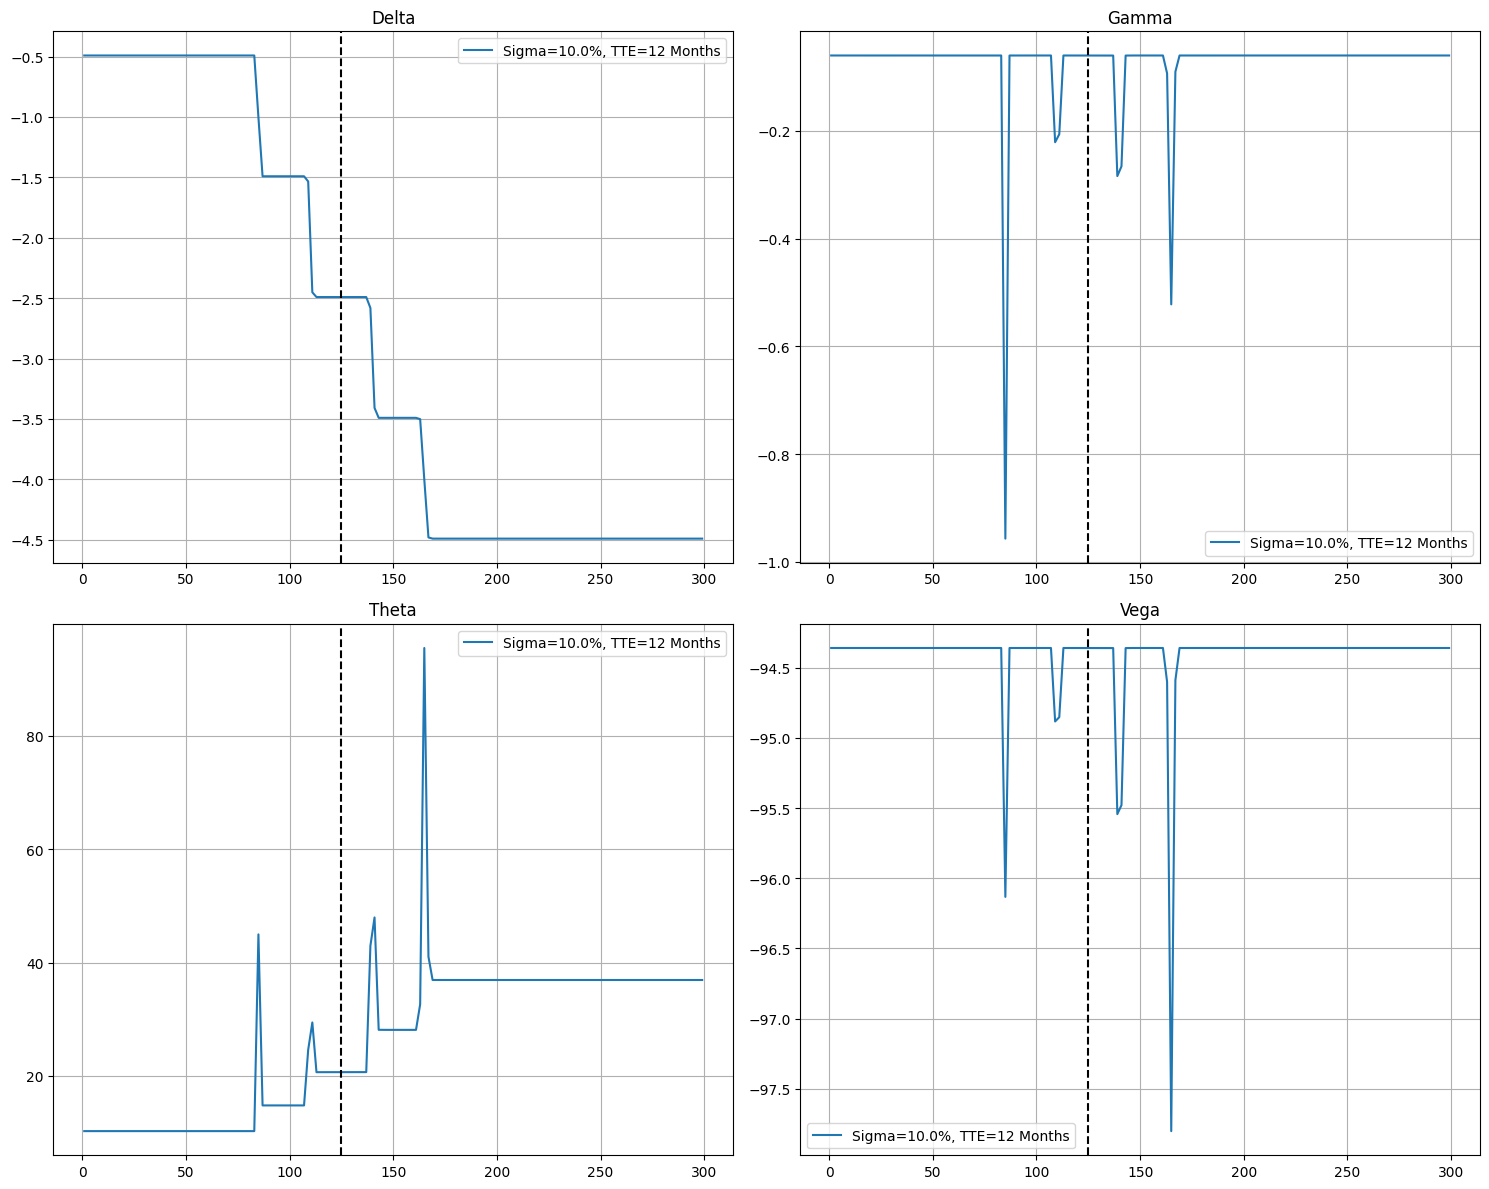

In [340]:
S = [i for i in range(1,300,2)]
T = [1]
rfr = 0.0533
sigma = [0.1]
K = [85,110,140,165]
print("Strikes : ",K)
def condor_greek(atm, S, K, T, rfr, sigma, opt="Call", greek="Delta"):
    p1 = bsm_greeks(atm, K[0], T, rfr, sigma, opt, greek)
    r1 = -bsm_greeks(atm, K[1], T, rfr, sigma, opt, greek)
    r2 = -bsm_greeks(atm, K[2], T, rfr, sigma, opt, greek)
    p2 = bsm_greeks(atm, K[3], T, rfr, sigma, opt, greek)
    buy = [p1+(p1-bsm_greeks(i, K[0], 1/365, rfr, sigma, opt, greek)) for i in S]
    sell_1 = [r1+(r1-bsm_greeks(i, K[1], 1/365, rfr, sigma, opt, greek)) for i in S]
    sell_2 = [r2+(r2-bsm_greeks(i, K[2], 1/365, rfr, sigma, opt, greek)) for i in S]
    buy_2 = [p2+(p2-bsm_greeks(i, K[3], 1/365, rfr, sigma, opt, greek)) for i in S]
    res = [buy[i] + sell_1[i] + sell_2[i] + buy_2[i] for i in range(len(buy))]
    return res
atm = 125
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, greek in enumerate(["Delta", "Gamma", "Theta", "Vega"]):
    for i in range(len(sigma)):
        axs[idx].plot(S, condor_greek(atm, S, K, T[i], rfr, sigma[i], "Call", greek), label=f"Sigma={sigma[i]*100}%, TTE={T[i]*12} Months")

    axs[idx].grid(True)
    axs[idx].legend()
    axs[idx].axvline(x=atm, linestyle="--", color="black")
    axs[idx].set_title(greek)

plt.tight_layout()
plt.show()